# <font color='#3d59c6'> MD005 Agrupación: Índices Mundiales </font>

<font color='#3d59c6'>**Objetivos:**</font>


*   Aplicar los métodos de agrupación (Jerárquico, K-means, DBSCAN, Optics) para agrupar la información del Dataset de Índices Mundiales.
*   Identificar que tan bien se ajusta cada método de clasificación.
*   Determinar la funcionalidad de cada método de agrupación.
*   Calcular los costes computacionales de los métods de agrupación.
*   Proponer alternativas que se adapten mejor

<font color='#3d59c6'>**Datos:**</font>

Índices mundiales: Datos de analítica nacional de 200 países desde 1970 (https://www.
kaggle.com/datasets/prasad22/global-economy-indicators/data)

**CountryID:** Código de identificación de cada país.

**Country:** Nombre del país.

**Year:** Año al que corresponden los datos.

**AMA Exchange Rate:** Tasas basadas en el IMF utilizando tipos de cambio ajustados al precio, calculados por la United Nation Statistics Division. Aplicado principalmente a países con regímenes de tipo de cambio fijo y países que atravesaban un período de alta inflación.

**IMF Based Exchange Rate:** Tipo de cambio basado en datos del Fondo Monetario Internacional (IMF)

**Population:** Población total del país

**Currency:** Moneda oficial del país.

**Per Capita GNI:** Ingreso Nacional Bruto (INB) per cápita. Medida del ingreso promedio de los residentes de un país.

**Agriculture, Hunting, Forestry, Fishing (ISIC A-B):** Actividad económica relacionada con la agricultura y sectores afines según el sistema de Clasificación Industrial Internacional Uniforme (CIIU).

**Changes in Inventories:** valor de las entradas en inventarios menos el valor de los retiros y el valor de cualquier pérdida recurrente de bienes mantenidos en inventarios.
Los cambios en los inventarios de existencias de productos que todavía están en poder de las unidades que los produjeron antes de ser procesados, vendidos, entregados a otras unidades o utilizados de otras maneras; y existencias de productos adquiridos de otras unidades que estén destinados a consumo intermedio o a reventa sin transformación adicional.

**Construction (ISIC F):** Actividad económica relacionada con el sector de la construcción y sectores afines según el sistema de Clasificación Industrial Internacional Uniforme (CIIU).

**Exports of Goods and Services:** El valor total de los bienes y servicios que exporta un país.

**Final Consumption Expenditure:** Gasto total de los hogares, instituciones sin ánimo de lucro y el gobierno en bienes y servicios para consumo final.

**General Government Final Consumption Expenditure:** Gasto público en bienes y servicios para consumo final.

**Gross Capital Formation:** Comprende las adquisiciones de activos fijos menos las disposiciones realizadas por unidades institucionales

**Gross Fixed Capital Formation (Including Acquisitions Less Disposals of Valuables):** valor total de las inversiones en activos físicos, teniendo en cuenta las adquisiciones netas y las disposiciones de bienes valiosos realizadas durante un período determinado.

**Household Consumption Expenditure (Including Non-profit Institutions Serving Households):** Gasto, incluyendo el gasto imputado, realizado por hogares residentes en bienes y servicios de consumo individual.

**Imports of Goods and Services:** El valor total de bienes y servicios que un país importa.
**Manufacturing (ISIC D):** Actividad económica relacionada con el sector de la Manufactura y sectores afines según el sistema de Clasificación Industrial Internacional Uniforme (CIIU).

**Mining, Manufacturing, Utilities (ISIC C-E):** Actividad económica relacionada con el sector de la Minería, Manufactura servicios públicos y sectores afines según el sistema de Clasificación Industrial Internacional Uniforme (CIIU).

**Other Activities (ISIC J-P):** Actividades económicas no cubiertas por otras categorías específicas, según la CIIU.

**Total Value Added:** Es una medida de la contribución al PIB realizada por todos los productores, industrias y sectores individuales.

**Transport, Storage, and Communication (ISIC I):** Actividad económica relacionada con el sector del transporte, almacenamiento y comunicaciones y sectores afines según el sistema de Clasificación Industrial Internacional Uniforme (CIIU).

**Wholesale, Retail Trade, Restaurants, and Hotels (ISIC G-H):** Actividad económica relacionada con el sector del Comercio al por mayor y detal, restaurantes y hoteles y sectores afines según el sistema de Clasificación Industrial Internacional Uniforme (CIIU).

**Gross National Income (GNI) in USD:**Ingreso Nacional total del país expresado en dólares estadounidenses.

**Gross Domestic Product (GDP)**: Producción económica total del país.


<font color='#3d59c6'>**PASOS:**</font>

0. Carga de Librerias y Packages
1. Carga de datos
2. Procesado Inicial:
    - Limpieza de datos
    - Identificación de Variables
    - Conclusiones
3. Clustering
    - Metodo Jerárquico
    - K means
    - DBSCAN
    - Optics
4. Conclusiones
5. Propuestas para mejora

#### Carga de Librerias y Packages

In [1]:
# Few packages for visualize and more
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import confusion_matrix
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage





In [2]:
import statsmodels.api as sm


#### Carga de Datos

In [3]:
global_indicators = pd.read_csv("/content/Global Economy Indicators.csv")

global_indicators.head()


CountryID        Country    Year    AMA exchange rate   \
0            4   Afghanistan     1970             0.044998   
1            4   Afghanistan     1971             0.044998   
2            4   Afghanistan     1972             0.044998   
3            4   Afghanistan     1973             0.044998   
4            4   Afghanistan     1974             0.044998   

    IMF based exchange rate    Population   Currency    Per capita GNI   \
0                   0.044998      10752971   Afghani                164   
1                   0.044998      11015857   Afghani                168   
2                   0.044998      11286753   Afghani                149   
3                   0.044998      11575305   Afghani                150   
4                   0.044998      11869879   Afghani                177   

    Agriculture, hunting, forestry, fishing (ISIC A-B)   \
0                                       8.699174e+08      
1                                       9.108281e+08      
2                                       8.279453e+08      
3                                       8.554869e+08      
4                                       1.035913e+09      

    Changes in inventories   ...  \
0                       NaN  ...   
1                       NaN  ...   
2                       NaN  ...   
3                       NaN  ...   
4                       NaN  ...   

    Household consumption expenditure (including Non-profit institutions serving households)   \
0                                       1.551094e+09                                            
1                                       1.675426e+09                                            
2                                       1.498812e+09                                            
3                                       1.508024e+09                                            
4                                       1.778819e+09                                            

    Imports of goods and services    Manufacturing (ISIC D)   \
0                      195277226.0               370146827.0   
1                      276296480.0               387549502.0   
2                      290370350.0               352284669.0   
3                      262962880.0               364010279.0   
4                      305679151.0               440760406.0   

    Mining, Manufacturing, Utilities (ISIC C-E)   \
0                                    376690811.0   
1                                    394401164.0   
2                                    358512865.0   
3                                    370445793.0   
4                                    448552790.0   

    Other Activities (ISIC J-P)    Total Value Added   \
0                    127747843.0         1.731454e+09   
1                    133754097.0         1.812857e+09   
2                    121582672.0         1.647918e+09   
3                    125630236.0         1.702735e+09   
4                    152119162.0         2.061752e+09   

    Transport, storage and communication (ISIC I)   \
0                                       83917200.0   
1                                       87860382.0   
2                                       79864525.0   
3                                       82528885.0   
4                                       99918604.0   

    Wholesale, retail trade, restaurants and hotels (ISIC G-H)   \
0                                        226387091.0              
1                                        237019196.0              
2                                        215477287.0              
3                                        222624293.0              
4                                        269525910.0              

    Gross National Income(GNI) in USD    Gross Domestic Product (GDP)   
0                         1.766528e+09                    1.731436e+09  
1                         1.850122e+09                    1.812838e+09  
2                         1.683948e+0

In [4]:
global_indicators.tail()


CountryID   Country    Year    AMA exchange rate   \
10507          894   Zambia     2017             9.519501   
10508          894   Zambia     2018            10.458143   
10509          894   Zambia     2019            12.889418   
10510          894   Zambia     2020            18.344093   
10511          894   Zambia     2021            20.018487   

        IMF based exchange rate    Population   Currency    Per capita GNI   \
10507                   9.519501      17298054    Kwacha               1448   
10508                  10.458143      17835893    Kwacha               1451   
10509                  12.889418      18380477    Kwacha               1246   
10510                  18.344093      18927715    Kwacha                928   
10511                  20.018487      19473125    Kwacha               1062   

        Agriculture, hunting, forestry, fishing (ISIC A-B)   \
10507                                       1.041005e+09      
10508                                       8.791160e+08      
10509                                       6.668385e+08      
10510                                       5.391694e+08      
10511                                       6.285287e+08      

        Changes in inventories   ...  \
10507               567729313.0  ...   
10508               929063411.0  ...   
10509               817104395.0  ...   
10510               439295787.0  ...   
10511               293485060.0  ...   

        Household consumption expenditure (including Non-profit institutions serving households)   \
10507                                       1.215309e+10                                            
10508                                       1.183200e+10                                            
10509                                       9.848112e+09                                            
10510                                       6.969267e+09                                            
10511                                       8.423339e+09                                            

        Imports of goods and services    Manufacturing (ISIC D)   \
10507                     9.465895e+09              2.102369e+09   
10508                     9.717269e+09              1.801783e+09   
10509                     7.961415e+09              1.582484e+09   
10510                     5.892353e+09              1.397303e+09   
10511                     7.735235e+09              1.876458e+09   

        Mining, Manufacturing, Utilities (ISIC C-E)   \
10507                                   7.194153e+09   
10508                                   6.556884e+09   
10509                                   5.584425e+09   
10510                                   4.269405e+09   
10511                                   6.639510e+09   

        Other Activities (ISIC J-P)    Total Value Added   \
10507                   6.187124e+09         2.416662e+10   
10508                   5.791375e+09         2.422570e+10   
10509                   5.231062e+09         2.153971e+10   
10510                   4.217431e+09         1.718020e+10   
10511                   4.250492e+09         2.071254e+10   

        Transport, storage and communication (ISIC I)   \
10507                                     1.965026e+09   
10508                                     2.490720e+09   
10509                                     2.537646e+09   
10510                                     2.258715e+09   
10511                                     2.060541e+09   

        Wholesale, retail trade, restaurants and hotels (ISIC G-H)   \
10507                                       5.323590e+09              
10508                                       5.990720e+09              
10509                                       4.959277e+09              
10510                                       3.234123e+09              
10511                                       3.881353e+09              

        Gross National Income(GNI) in USD    Gross

In [5]:
global_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0    CountryID                                                                                  10512 non-null  int64  
 1    Country                                                                                    10512 non-null  object 
 2    Year                                                                                       10512 non-null  int64  
 3    AMA exchange rate                                                                          10512 non-null  float64
 4    IMF based exchange rate                                                                    10512 non-null  float64
 5    Population                            

Se observa que hay un total de 10512 datos, de los cuales 'Country' y 'Currency' son de tipo categórico.

Algunas variables presentan N/A:

*   Agriculture, Hunting, Forestry, Fishing (ISIC A-B)
*   Changes in Inventories
*   Exports of Goods and Services
*   General Government Final Consumption Expenditure
*   Gross Capital Formation
*   Gross Fixed Capital Formation (Including Acquisitions Less Disposals of Valuables)
*   Household Consumption Expenditure (Including Non-profit Institutions Serving Households)
*   Imports of Goods and Services
*   Manufacturing (ISIC D)
*   Transport, Storage, and Communication (ISIC I)
*   Wholesale, Retail Trade, Restaurants, and Hotels (ISIC G-H)

Analizando los datos se puede observar que son índices desde los años 70 a 2023. Para acotar el problema, se ha decidido tomar datos macroeconómicos comprendidos entre el año 2000 y 2019 donde los efectos de la pandemia aún no permeaban la economía de los países.
Dado a la naturaleza y diversidad de paises, se tomo el GNI per cápita (un valor mayor de 10.000 usd, cercano a la media de la variable) y Population (mayor a 1 Millon de habitantes) a como filtros, para intentar tener mayor homogeneidad de los datos.

###2. Procesado Inicial:- Limpieza de datos
    

In [6]:
# Utilizar el método describe para obtener un resumen estadístico
resumen_estadistico = global_indicators.describe()

# Imprimir el resumen estadístico
print(resumen_estadistico)

         CountryID          Year    AMA exchange rate   \
count  10512.000000  10512.000000         1.051200e+04   
mean     431.116629   1996.262747         3.573959e+02   
std      251.169090     14.900361         2.291128e+03   
min        4.000000   1970.000000         4.300000e-14   
25%      212.000000   1984.000000         1.000000e+00   
50%      430.000000   1997.000000         2.812895e+00   
75%      643.000000   2009.000000         5.134316e+01   
max      894.000000   2021.000000         1.116366e+05   

        IMF based exchange rate    Population    Per capita GNI   \
count               1.051200e+04  1.051200e+04      10512.000000   
mean                3.419846e+02  2.851523e+07       8965.564593   
std                 1.941857e+03  1.141296e+08      17070.205895   
min                 4.300000e-14  4.359000e+03         34.000000   
25%                 1.000000e+00  6.330615e+05        730.000000   
50%                 2.761315e+00  5.051556e+06       2316.500000   
7

In [7]:
#Creamos un filtro para analizar los datos macroeconomicos del 2010 al 2019
indices_filtrados = global_indicators[(global_indicators[' Year '] >= 2000) & (global_indicators[' Year '] <= 2019) &
(global_indicators[' Per capita GNI '] > 10000) & (global_indicators[' Population '] > 1000000)]

###2. Procesado Inicial:- Identificación de Variables

Este modelo se va a basar en variables per cápita, que permiten tener una mayor homogeneidad de los datos sin perder información de los mismos. Otra opción habría podido ser Normalizar los datos. Sin embargo, al tener variables per cápita en el modelo, y ya que son comunes en índices macroeconómicos, se decidió dividir las variables por la población del país


In [8]:
# Establecemos las variables que vamos a utilizar para el modelo de jerarquia.
#Dividiento por la población las variables que no son per cápita.
clean_global_indicators = global_indicators.copy()

variables_seleccionadas = [' Country ', ' Year ', ' Population ',  ' Per capita GNI ', ' Exports of goods and services ', ' Imports of goods and services ',' Gross Domestic Product (GDP) ']
indices_filtrados = indices_filtrados[variables_seleccionadas]

In [9]:
global_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0    CountryID                                                                                  10512 non-null  int64  
 1    Country                                                                                    10512 non-null  object 
 2    Year                                                                                       10512 non-null  int64  
 3    AMA exchange rate                                                                          10512 non-null  float64
 4    IMF based exchange rate                                                                    10512 non-null  float64
 5    Population                            

In [10]:
indices_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 384 to 10326
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0    Country                         876 non-null    object 
 1    Year                            876 non-null    int64  
 2    Population                      876 non-null    int64  
 3    Per capita GNI                  876 non-null    int64  
 4    Exports of goods and services   876 non-null    float64
 5    Imports of goods and services   876 non-null    float64
 6    Gross Domestic Product (GDP)    876 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 54.8+ KB


Observamos que tenemos 876 muestras, sin N/a

In [11]:
# Imprimir los nombres únicos de los países en la columna "Country"
nombres_paises_unicos = indices_filtrados[' Country '].unique()
print(nombres_paises_unicos)

[' Argentina ' ' Australia ' ' Austria ' ' Bahrain ' ' Belgium '
 ' Brazil ' ' Canada ' ' Chile ' ' China ' ' Costa Rica ' ' Croatia '
 ' Czechia ' ' Denmark ' ' Equatorial Guinea ' ' Estonia ' ' Finland '
 ' France ' ' Germany ' ' Greece ' ' China, Hong Kong SAR ' ' Hungary '
 ' Ireland ' ' Israel ' ' Italy ' ' Japan ' ' Kazakhstan '
 ' Republic of Korea ' ' Kuwait ' ' Latvia ' ' Libya ' ' Lithuania '
 ' Malaysia ' ' Mauritius ' ' Mexico ' ' Oman ' ' Netherlands '
 ' New Zealand ' ' Norway ' ' Panama ' ' Poland ' ' Portugal '
 ' Puerto Rico ' ' Qatar ' ' Romania ' ' Russian Federation '
 ' Saudi Arabia ' ' Singapore ' ' Slovakia ' ' Slovenia ' ' Spain '
 ' Sweden ' ' Switzerland ' ' Trinidad and Tobago '
 ' United Arab Emirates ' ' Türkiye ' ' United Kingdom ' ' United States '
 ' Uruguay ' ' Venezuela (Bolivarian Republic of) ']


In [12]:
# #paises_europeos = [
#     ' Albania ', ' Andorra ', ' Austria ', ' Belgium ', ' Bosnia and Herzegovina ', ' Bulgaria ', ' Croatia ', ' Cyprus ',
#     ' Czechia ', ' Denmark ', ' Estonia ', ' Finland ', ' France ', ' Germany ', ' Greece ', ' Hungary ', ' Iceland ', ' Ireland ',
#     ' Italy ', ' Kosovo ', ' Latvia ', ' Liechtenstein ', ' Lithuania ', ' Luxembourg ', ' Malta ', ' Moldova ', ' Monaco ',
#     ' Montenegro ', ' Netherlands ', ' North Macedonia ', ' Norway ', ' Poland ', ' Portugal ', ' Romania ', ' San Marino ',
#     ' Serbia ', ' Slovakia ', ' Slovenia ', ' Spain ', ' Sweden ', ' Switzerland ', ' United Kingdom '
# ]

# # Filtrar los datos solo para países europeos
# datos_europeos = indices_filtrados[indices_filtrados[' Country '].isin(paises_europeos)]

In [13]:
# paises_europeos = [
#     ' Albania ', ' Andorra ', ' Austria ', ' Belgium ', ' Bosnia and Herzegovina ', ' Bulgaria ', ' Croatia ', ' Cyprus ',
#     ' Czechia ', ' Denmark ', ' Estonia ', ' Finland ', ' France ', ' Germany ', ' Greece ', ' Hungary ', ' Iceland ', ' Ireland ',
#     ' Italy ', ' Kosovo ', ' Latvia ', ' Liechtenstein ', ' Lithuania ', ' Luxembourg ', ' Malta ', ' Moldova ', ' Monaco ',
#     ' Montenegro ', ' Netherlands ', ' North Macedonia ', ' Norway ', ' Poland ', ' Portugal ', ' Romania ', ' San Marino ',
#     ' Serbia ', ' Slovakia ', ' Slovenia ', ' Spain ', ' Sweden ', ' Switzerland ', ' United Kingdom '
# ]

# # Filtrar los datos solo para países europeos
# datos_europeos = indices_filtrados[indices_filtrados[' Country '].isin(paises_europeos)]

In [14]:
# Creamos las variables per capita, dividiendo por la población las variables que no son per cápita.
copia_indices = indices_filtrados.copy()

# Crear variables per cápita directamente
copia_indices['Exports_per_capita'] = copia_indices[' Exports of goods and services '] / copia_indices[' Population ']
copia_indices['Imports_per_capita'] = copia_indices[' Imports of goods and services '] / copia_indices[' Population ']
copia_indices['GDP_per_capita'] = copia_indices[' Gross Domestic Product (GDP) '] / copia_indices[' Population ']

# Redondear a 2 cifras significativas
copia_indices['Exports_per_capita'] = copia_indices['Exports_per_capita'].round(2)
copia_indices['Imports_per_capita'] = copia_indices['Imports_per_capita'].round(2)
copia_indices['GDP_per_capita'] = copia_indices['GDP_per_capita'].round(2)

# Eliminar las columnas originales
copia_indices = copia_indices.drop([' Exports of goods and services ', ' Imports of goods and services ', ' Gross Domestic Product (GDP) '], axis=1)

# Renombrar las columnas
copia_indices.rename(columns={
    ' Country ': 'Country',
    ' Year ': 'Year',
    ' Population ': 'Population',
    ' Per capita GNI ': 'GNI_Per_capita'
}, inplace=True)

In [15]:
copia_indices.head()

Country  Year  Population  GNI_Per_capita  Exports_per_capita  \
384   Argentina   2010    41100123           10023             1964.72   
385   Argentina   2011    41520740           12404             2355.69   
386   Argentina   2012    41952365           13532             2250.46   
387   Argentina   2013    42388269           14159             2114.96   
388   Argentina   2014    42824054           12970             1907.49   

     Imports_per_capita  GDP_per_capita  
384             1664.15        10364.93  
385             2139.61        12764.71  
386             1980.31        13849.04  
387             2129.37        14461.55  
388             1853.97        13240.22

In [16]:
# Utilizar el método describe para obtener un resumen estadístico
resumen_estadistico = copia_indices.describe()

# Imprimir el resumen estadístico
print(resumen_estadistico)


              Year    Population  GNI_Per_capita  Exports_per_capita  \
count   876.000000  8.760000e+02      876.000000          876.000000   
mean   2010.630137  3.143360e+07    31844.207763        18277.444338   
std       5.469935  7.152564e+07    18365.061069        18558.289561   
min    2000.000000  1.015060e+06    10015.000000         1222.290000   
25%    2006.000000  4.366470e+06    16061.000000         7024.060000   
50%    2011.000000  8.700728e+06    27002.000000        12144.860000   
75%    2015.000000  3.477344e+07    44249.000000        21640.692500   
max    2019.000000  1.421864e+09   103989.000000       114540.500000   

       Imports_per_capita  GDP_per_capita  
count          876.000000      876.000000  
mean         15959.354772    32424.086667  
std          15832.281408    18390.217076  
min           1339.420000    10057.220000  
25%           7051.200000    17060.947500  
50%          11010.980000    28120.900000  
75%          17870.210000    44280.692500  

Una vez observamos que se ha realizado la limpieza de datos correctamente, sacamos del análisis estadístico la variable categórica 'country', ya que no es continua, al haber tantos países no es recomendable usarla como variable objetivo



In [17]:
global_indicators_sinetiqueta = copia_indices.copy()

variables_seleccionadas = ['GNI_Per_capita',
       'Exports_per_capita',
       'Imports_per_capita',
      'GDP_per_capita']
global_indicators_sinetiqueta = global_indicators_sinetiqueta[variables_seleccionadas]

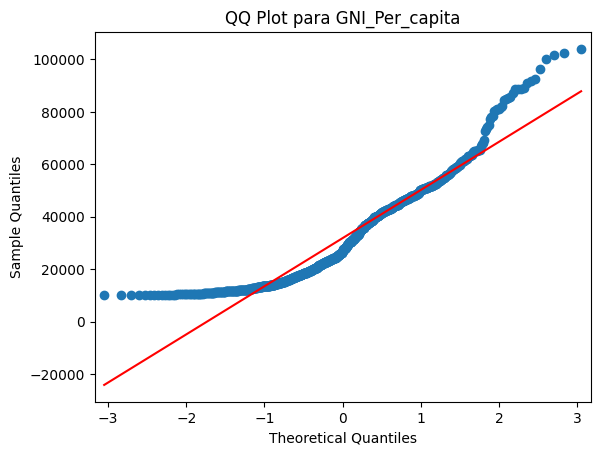

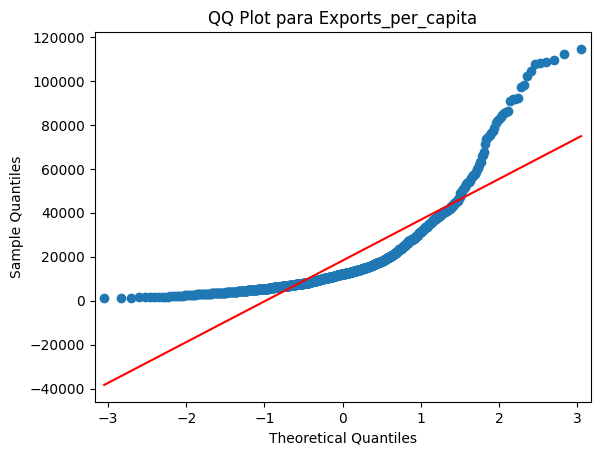

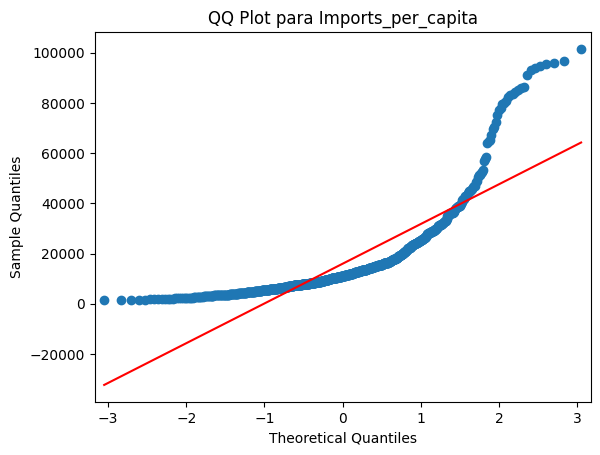

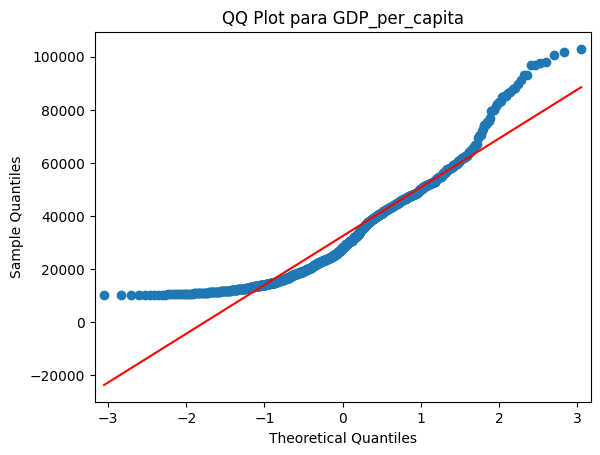

In [18]:
# Seleccionar solo las columnas numéricas
columna_numericas = global_indicators_sinetiqueta.select_dtypes(include='number')

# Iterar sobre cada columna numérica y crear QQ plot
for columna in columna_numericas.columns:
    sm.qqplot(columna_numericas[columna], line='s')
    plt.title(f'QQ Plot para {columna}')
    plt.show()

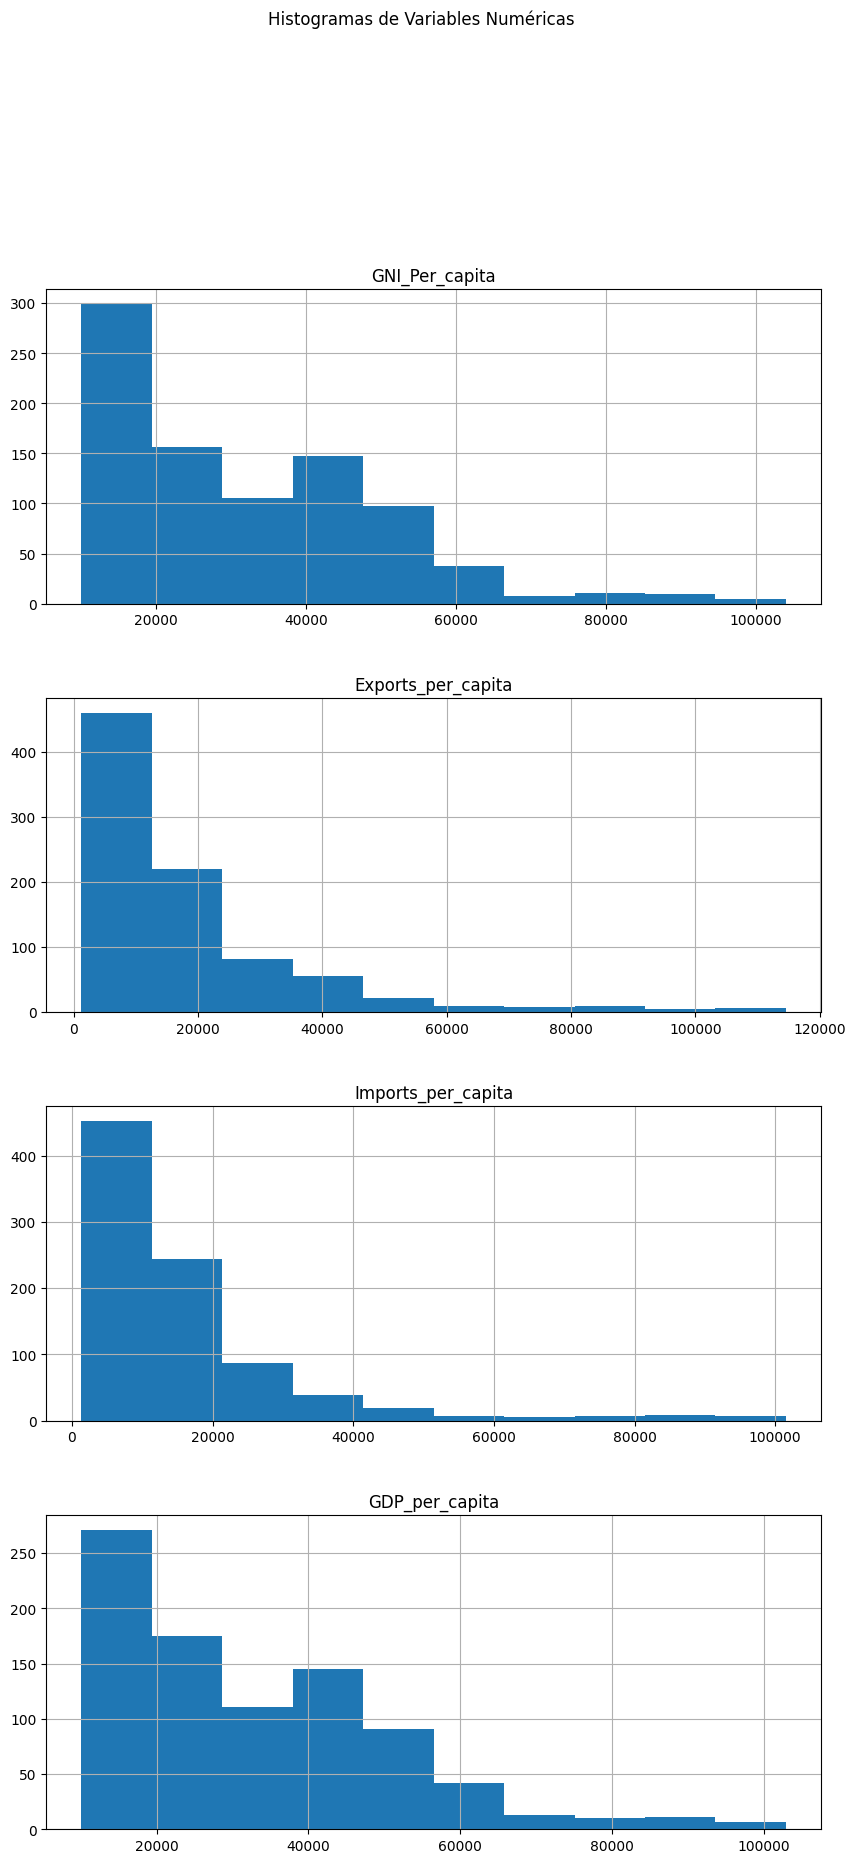

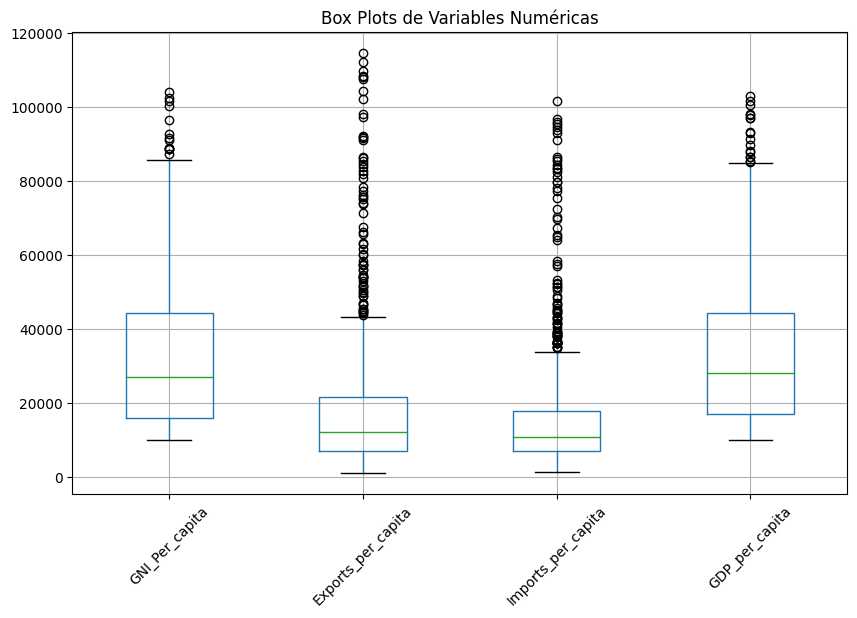

In [19]:
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
columnas_numericas = global_indicators_sinetiqueta.select_dtypes(include='number')

# Crear histogramas para cada columna
columnas_numericas.hist(layout=(len(columnas_numericas.columns), 1), figsize=(10, 20), bins=10)
plt.suptitle('Histogramas de Variables Numéricas', y=1.02)
plt.show()

# Crear box plots para cada columna
columnas_numericas.boxplot(rot=45, figsize=(10, 6))
plt.title('Box Plots de Variables Numéricas')
plt.show()

###2. Procesado Inicial:- Conclusiones

Luego de intentar de implementar el método jerárquico en la totalidad del dataset, aparecen errores ya que hay campos con Nah.

Para acotar el problema, se ha escogido un análisis que incluye variables macroeconómicas relacionadas al tamaño de población y al gross national income. Así se hacen más manejables los órdenes de magnitud de los datos.

De los datos anualizados, se ha escogido el periodo que comprende la década de 2010 a 2019. Es un periodo de mayor uniformidad macroeconómica en donde se está saliendo de la crisis económica del 2008-2009. Por el otro lado, termina en 2019 justo cuando inició la pandemia causada por el Covid-19.

También se han incluido variables que están directamente relacionadas con la población del país. Así, esos valores per cápita son más fáciles de visualizar y comparar.

Luego de los filtrados nos hemos quedado con 876 datos. Las variables no parecen tener normalidad en la totalidad del rango, especialmente en los extremos como se puede ver en el qqplot.

Cuando se hizo un filtrado, comparando solo los países europeos, las variables presentaban un comportamiento "normal" que se ajustaba mejor a la recta del qqplot. Pero los datos disponibles bajaban a la mitad.

También se observan bastantes outliers en el boxplot. Sobretodo en las variables Import/export per cápita. El resumen estadístico de las variabls, muestra unos valores bastante altos de la desviación estandar comparados con la media. Es decir que es posible que una selección por continentes, puede que haga que las muestas tengan una desviación estandar menor.

Al final, la selección de los filtros es

*   Datos macroeconomicos del 2010 al 2019
*   GNI per Cápita > 10.000
*   Población > 1'000.000



###3. Clustering - Método Jerárquico

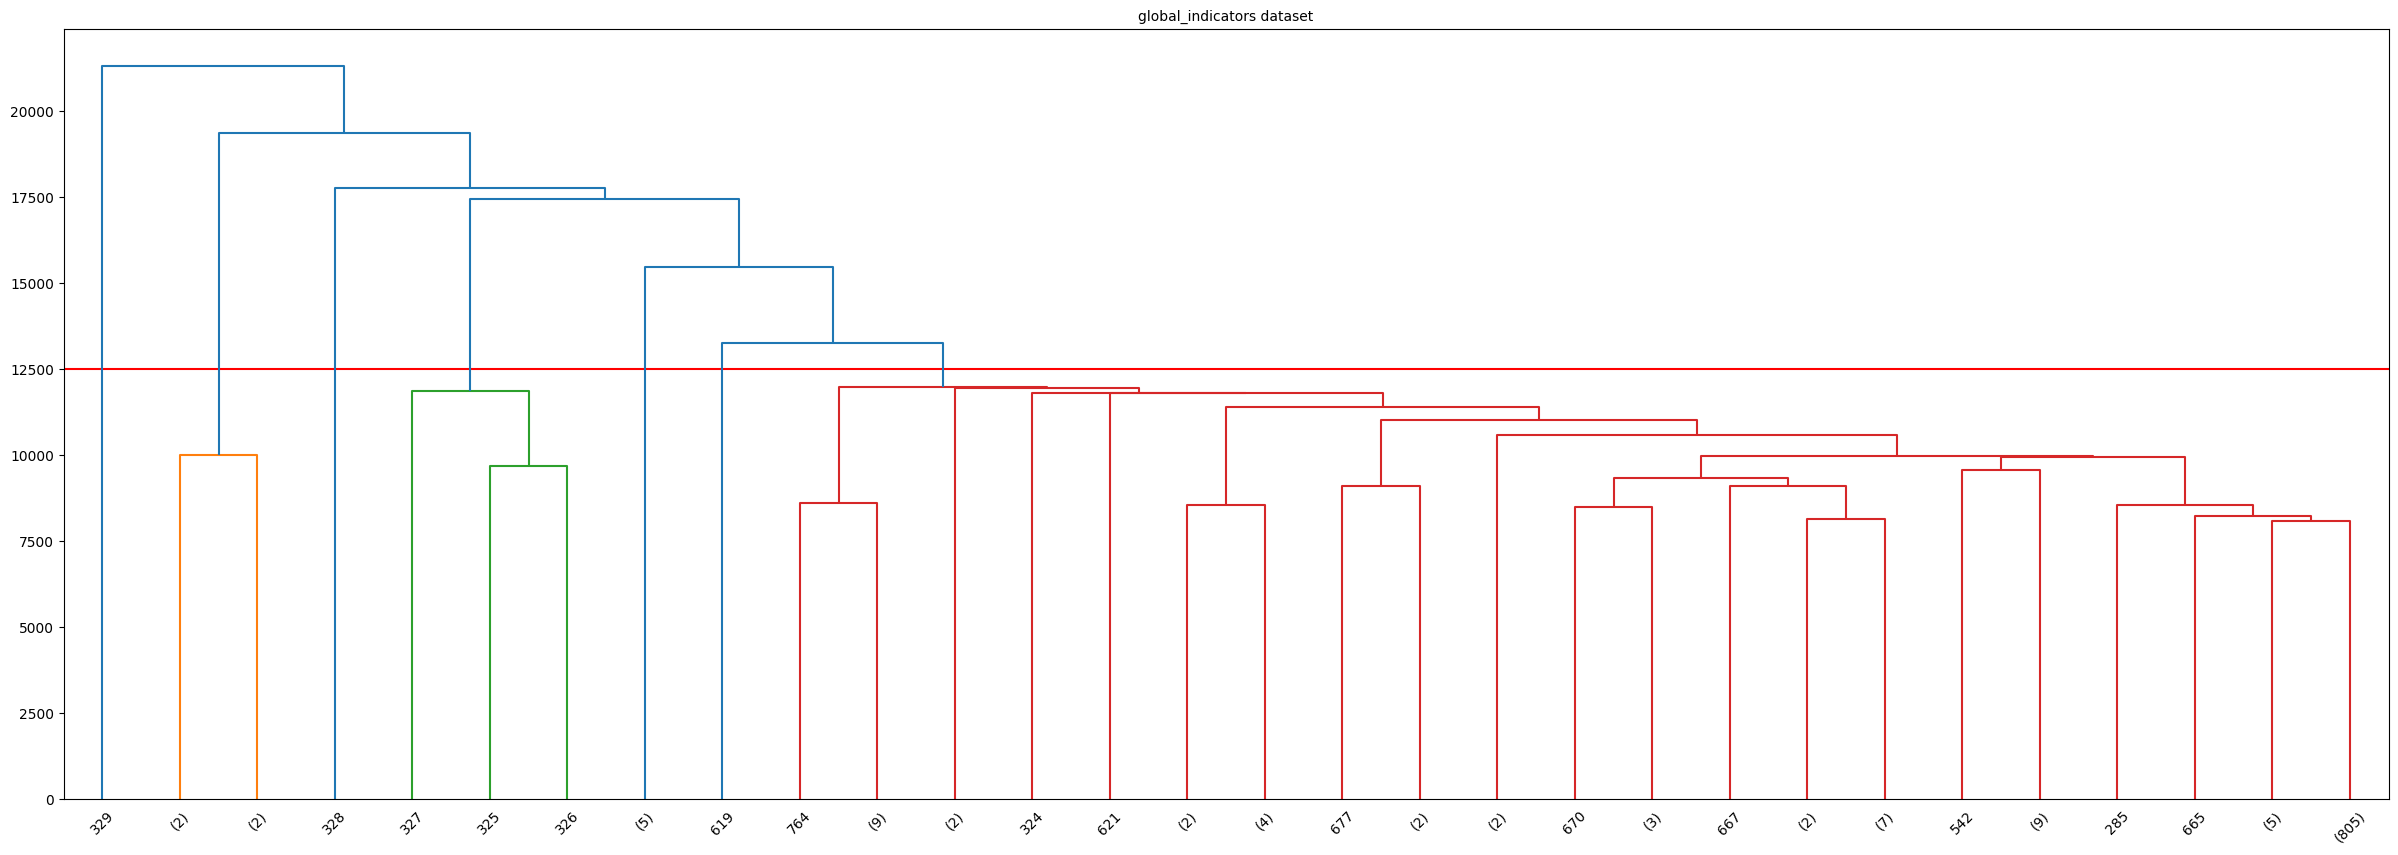

In [20]:
Z = hierarchy.linkage(global_indicators_sinetiqueta)

plt.figure(figsize = (30, 10))
# Color threshold is basically where do we apply the 'cut' (linkage metric). For us, is all those elements closer than the value
# count_sort just sorts from bigger to smaller

cLimit = 12500
#dn = hierarchy.dendrogram(Z, color_threshold = cLimit, count_sort = "ascending") # ascending/descending are both acceptable
plt.hlines(cLimit, 0, 1600, color = 'r')

# Summarized dendogram (need to comment the previous dn!)
dn = hierarchy.dendrogram(Z, truncate_mode = 'lastp', color_threshold = cLimit, count_sort = "ascending")
plt.title("global_indicators dataset", fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

Utilizando los filtros de periodo, GNI y población mencionados anteriormente, y el método resumido del dendograma con cLimit = 12500, podemos hacer una identificación visual de 3 grupos, en color naranja, rojo y verde.

In [21]:
# Utilizamos 3 clusters para generar los grupos
clustering = AgglomerativeClustering(n_clusters = 3).fit(global_indicators_sinetiqueta)

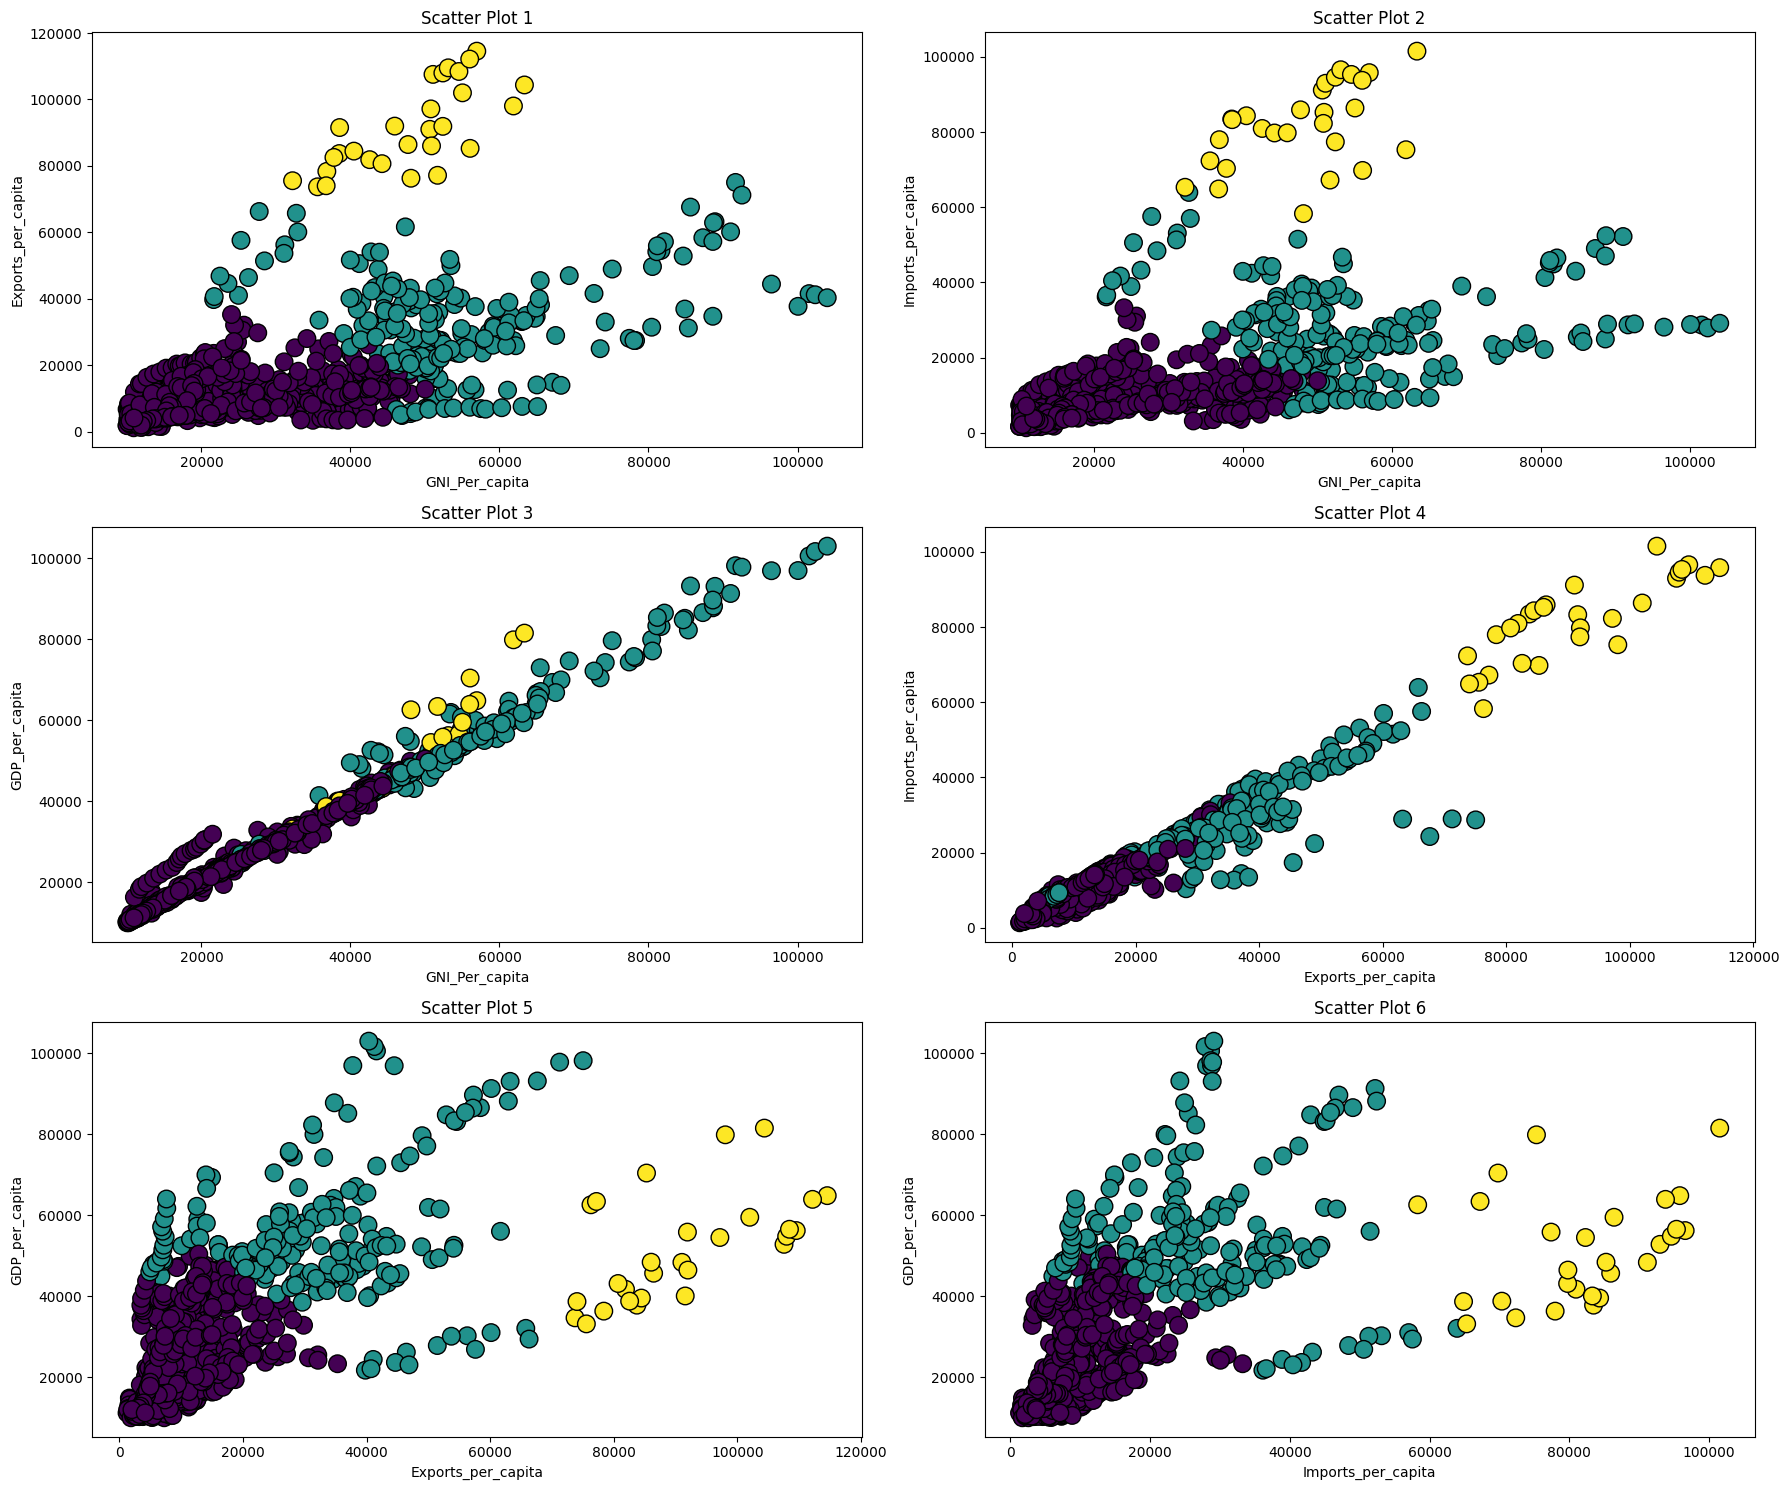

In [22]:
plt.figure(figsize=(18, 15))

# Variables a combinar
variables = ['GNI_Per_capita', 'Exports_per_capita', 'Imports_per_capita', 'GDP_per_capita']

# Combinaciones de variables
combinations = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

for i, (var1, var2) in enumerate(combinations, 1):
    plt.subplot(3, 2, i)
    x = global_indicators_sinetiqueta[variables[var1]]
    y = global_indicators_sinetiqueta[variables[var2]]
    plt.scatter(x, y, c=clustering.labels_, cmap="viridis", edgecolors='black', s=160)
    plt.xlabel(variables[var1])
    plt.ylabel(variables[var2])
    plt.title(f"Scatter Plot {i}")

plt.tight_layout()
plt.show()

El método Jerárquico permite identificar visualmente grupos de datos que pueden ser separables. Cuando se tienen muchas variables, es muy difícil identificar los grupos. Sin embargo, cuando se reducen las variables y se escogen las más relevantes, es posible hacer de manera más sencilla, la identificación y agrupación de los datos.

En este caso, jugando con la combinación de variables ('GNI_Per_capita', 'Exports_per_capita', 'Imports_per_capita', 'GDP_per_capita'), se pueden diferenciar 3 grupos bastante definidos cuando se hace el dendograma con las variables 'GNI_Per_capita' y 'Exports_per_capita'.

Cabe resaltar que la transformación de las variables a per cápita no implica perdida de información pues se está haciendo una división por la variable población; pero si permite tener una visión aterrizada de estos conceptos macroeconómicos, que pueden llegar a ser muy dispares cuando se analizan varios países de regiones y características diferentes.

Al reducir el número de variables, se redujeron también los costes por funcionamiento, aunque en este caso con los datos reducidos, esta comparación de costos puede dar una mínima variación.

Una alternativa, puede ser, a parte de los filtros (de población, GNI y temporalidad) clasificar por continentes. Esto nos asegura cierto nivel de uniformidad en los datos. Al menos mejor y mas consistente que la uniformidad de los datos globales.
También se podría normalizar los datos para evitar que las escalas de los valores macroeconómicos no sean visualmente comparables.




###3. Clustering - K Means

*   #### Paso 1: Estructura de los datos

In [23]:
import seaborn as sns

In [24]:
# Checking some other samples
global_indicators_sinetiqueta[:10]

GNI_Per_capita  Exports_per_capita  Imports_per_capita  GDP_per_capita
384           10023             1964.72             1664.15        10364.93
385           12404             2355.69             2139.61        12764.71
386           13532             2250.46             1980.31        13849.04
387           14159             2114.96             2129.37        14461.55
388           12970             1907.49             1853.97        13240.22
389           14630             1596.07             1756.32        14910.86
390           12486             1599.39             1732.13        12778.17
391           14237             1653.87             2040.89        14618.22
392           11395             1705.93             1929.17        11820.70
426           20947             4777.23             4758.70        21558.57

In [25]:
# Shuffling dataset
global_indicators_sinetiqueta = global_indicators_sinetiqueta.sample(frac=1).reset_index(drop=True)

# Recheck
global_indicators_sinetiqueta[:10]

GNI_Per_capita  Exports_per_capita  Imports_per_capita  GDP_per_capita
0           56747            37677.29            21444.36        59978.67
1           10176             3351.88             3472.82        10366.64
2           18593            15031.78            14080.40        19883.81
3           42224            12209.21            12228.80        43815.00
4           31291             9148.58             8117.28        31271.51
5           54557           108428.29            95323.55        56547.87
6           44449            37145.47            33741.94        44891.45
7           11518             6073.12             6311.22        11403.12
8           28386             7255.73             7595.58        28377.21
9           11725             7695.08             3693.02        11611.36

#### Paso 2: Conocimiento de los datos

<Figure size 2000x2000 with 0 Axes>

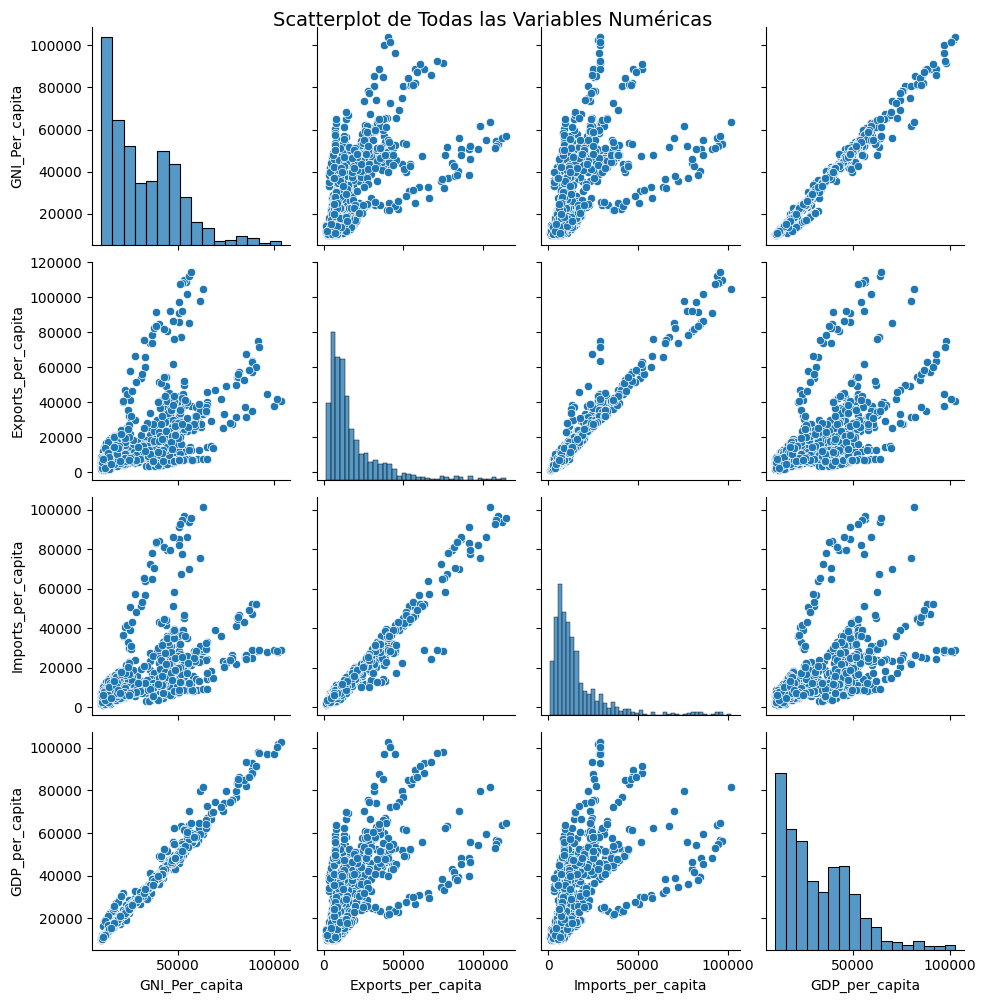

In [26]:
#Scatterplot
plt.figure(figsize=(20, 20))
sns.pairplot(global_indicators_sinetiqueta)
plt.suptitle('Scatterplot de Todas las Variables Numéricas', y=1, fontsize=14)
plt.show()

In [27]:
# sns.heatmap(global_indicators_sinetiqueta.corr(), annot = True)

Previamente en el método jerárquico se realizaron histogramas y boxplot de los datos. Se observa que las variables tienen correlación entre ellas. Destacan la correlación de GDP y GDI, donde el concepto macroeconómico nos define GDP como el valor de lo que se produce y el GDI como lo que se gana por producir.


Destaca también la correlación positiva entre Exportaciones vs Importaciones. Es posible que en ciertos países exportadores como Japón o importadores como las islas caribeñas, esta correlación sea negativa.

In [28]:
global_indicators_sinetiqueta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GNI_Per_capita      876 non-null    int64  
 1   Exports_per_capita  876 non-null    float64
 2   Imports_per_capita  876 non-null    float64
 3   GDP_per_capita      876 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 27.5 KB


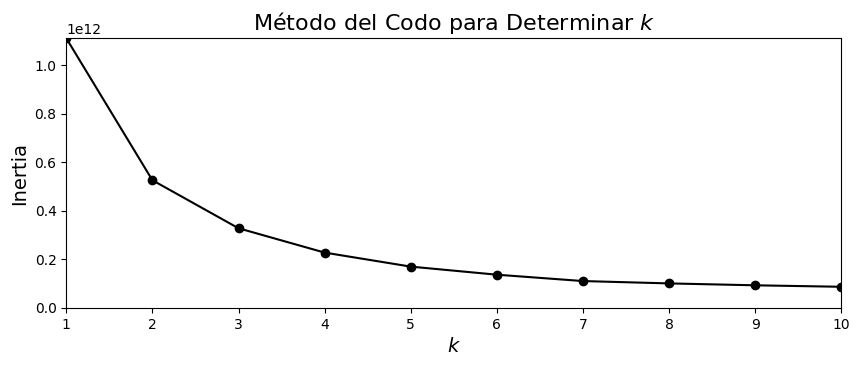

In [29]:
# 2- Seleccionar la cantidad de clústeres óptima (circustancia de no tener conocimiento del dataset)
# Redondear los valores de k
rounded_k_values = range(1, 11)

# Generación de 'k' modelos KMeans para el cálculo de inercias, con todo el dataset conjuntamente
kmeans_model_list = [KMeans(n_clusters=k, random_state=4, n_init='auto').fit(global_indicators_sinetiqueta) for k in rounded_k_values]

# Cálculo de la inercia por cada modelo generado previamente. El resultado es un vector que se dibujará para analizar el codo
inertias = [model.inertia_ for model in kmeans_model_list]

# Libreria pyplot
import matplotlib.pyplot as plt

# Caracterización de la figura a mostrar
plt.figure(figsize=(10, 3.5))

# Visualización del rango de inercias de color azul, marcando los puntos y uniendo con línea
plt.plot(rounded_k_values, inertias, "ko-")

# Etiquetas ejes horizontal y vertical
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

# Redondear los límites de los ejes
plt.axis([min(rounded_k_values), max(rounded_k_values), 0, max(inertias)])

# Título del gráfico
plt.title("Método del Codo para Determinar $k$", fontsize=16)

# Mostrar el gráfico
plt.show()


El gráfico anterior nos sugiere que un buen número de codo o de grupos a seleccionar puede estar entre 2 y 4. En este caso tomamos 3, ya que el método jerárquico nos dió una noción del número optimo de agrupación.

  #### Paso 3: Procesos de Mejora

Vamos a tratar de usar las variables normalizadas para poder hacer el analisis de clasificación con muchas más variables.


Quitamos los filtrados for GNI per cápita que teniamos anteriormente, y dejamos las temporales y de tamaño de población

In [30]:
# Renombrando las variables

global_indicators.rename(columns={' CountryID ': 'CountryID'}, inplace=True)

global_indicators.rename(columns={' Country ': 'Country'}, inplace=True)

global_indicators.rename(columns={' Year ': 'Year'}, inplace=True)

global_indicators.rename(columns={' Population ': 'Population'}, inplace=True)

global_indicators.rename(columns={' Currency ': 'Currency'}, inplace=True)

global_indicators.rename(columns={' AMA exchange rate ': 'AMA_exchange_rate'}, inplace=True)

global_indicators.rename(columns={' IMF based exchange rate ': 'IMF_based_exchange_rate'}, inplace=True)

global_indicators.rename(columns={" Per capita GNI ":"Per_capita_GNI"}, inplace=True)

global_indicators.rename(columns={" Agriculture, hunting, forestry, fishing (ISIC A-B) ":"Agriculture_hunting_forestry_fishing_(ISIC_A-B)"}, inplace=True)

global_indicators.rename(columns={" Changes in inventories ":"Changes_in_inventories"}, inplace=True)

global_indicators.rename(columns={" Construction (ISIC F) ":"Construction_(ISIC_F)"}, inplace=True)

global_indicators.rename(columns={" Exports of goods and services ":"Exports_of_goods_and_services"}, inplace=True)

global_indicators.rename(columns={" Final consumption expenditure ":"Final_consumption_expenditure"}, inplace=True)

global_indicators.rename(columns={" General government final consumption expenditure ":"General_government_final_consumption_expenditure"},inplace=True)

global_indicators.rename(columns={" Gross capital formation ":"Gross_capital_formation"},inplace=True)

global_indicators.rename(columns={" Gross fixed capital formation (including Acquisitions less disposals of valuables) ":"Gross_fixed_capital_formation_(including_Acquisitions_less_disposals_of_valuables)"},inplace=True)

global_indicators.rename(columns={" Household consumption expenditure (including Non-profit institutions serving households) ":"Household_consumption_expenditure_(including_Non-profit _institutions_serving _households)"},inplace=True)

global_indicators.rename(columns={" Imports of goods and services ":"Imports_of_goods_and_services"},inplace=True)

global_indicators.rename(columns={" Manufacturing (ISIC D) ":"Manufacturing_(ISIC_D)"},inplace=True)

global_indicators.rename(columns={" Mining, Manufacturing, Utilities (ISIC C-E) ":"Mining_Manufacturing,_Utilities_(ISIC_C-E)"},inplace=True)

global_indicators.rename(columns={" Other Activities (ISIC J-P) ":"Other_Activities_(ISIC_J-P)"},inplace=True)

global_indicators.rename(columns={" Total Value Added ":"Total_Value_Added"},inplace=True)

global_indicators.rename(columns={" Transport, storage and communication (ISIC I) ":"Transport_storage_and_communication_(ISIC_I)"},inplace=True)

global_indicators.rename(columns={" Wholesale, retail trade, restaurants and hotels (ISIC G-H) ":"Wholesale_retail_trade_restaurants_and_hotels_(ISIC_G-H)"},inplace=True)

global_indicators.rename(columns={" Gross National Income(GNI) in USD ":"Gross_National_Income(GNI)_in_USD"},inplace=True)

global_indicators.rename(columns={" Gross Domestic Product (GDP) ":"Gross_Domestic_Product_(GDP)"},inplace=True)

####Filtrando datos

In [31]:
#Nuevo filtro para analizar los datos macroeconomicos del 2010 al 2019 con etiqueta
nuevos_filtros = global_indicators[(global_indicators['Year'] == 2021) &
(global_indicators['Population'] > 100000) & (global_indicators['Per_capita_GNI'] > 1000)]

In [32]:
nuevos_filtros.describe()

CountryID    Year  AMA_exchange_rate  IMF_based_exchange_rate  \
count  166.000000   166.0         166.000000               166.000000   
mean   425.493976  2021.0        1342.259489               896.533464   
std    249.175945     0.0        8994.191648              4106.577469   
min      8.000000  2021.0           0.301643                 0.301643   
25%    215.000000  2021.0           1.334289                 1.343564   
50%    415.500000  2021.0           8.303335                 8.303335   
75%    629.000000  2021.0         107.969375               107.969375   
max    894.000000  2021.0      111636.628300             42000.000000   

         Population  Per_capita_GNI  \
count  1.660000e+02      166.000000   
mean   4.335913e+07    17051.933735   
std    1.603427e+08    21031.620933   
min    1.043320e+05     1046.000000   
25%    1.756686e+06     3569.000000   
50%    7.091318e+06     6955.500000   
75%    2.957621e+07    22844.000000   
max    1.425893e+09    93369.000000   

       Agriculture_hunting_forestry_fishing_(ISIC_A-B)  \
count                                     1.650000e+02   
mean                                      2.441321e+10   
std                                       1.147369e+11   
min                                       8.414460e+05   
25%                                       5.872826e+08   
50%                                       3.454050e+09   
75%                                       1.423319e+10   
max                                       1.350000e+12   

       Changes_in_inventories  Construction_(ISIC_F)  \
count            1.380000e+02           1.660000e+02   
mean             4.768113e+09           3.173018e+10   
std              1.801236e+10           1.258613e+11   
min             -2.082381e+10           7.536789e+06   
25%              1.026301e+07           6.862832e+08   
50%              5.783015e+08           3.210676e+09   
75%              3.603334e+09           1.641526e+10   
max              1.710000e+11           1.240000e+12   

       Exports_of_goods_and_services  ...  \
count                   1.660000e+02  ...   
mean                    1.650267e+11  ...   
std                     4.123227e+11  ...   
min                     1.075492e+07  ...   
25%                     5.205599e+09  ...   
50%                     2.186337e+10  ...   
75%                     1.082500e+11  ...   
max                     3.530000e+12  ...   

       Household_consumption_expenditure_(including_Non-profit _institutions_serving _households)  \
count                                       1.660000e+02                                            
mean                                        3.152611e+11                                            
std                                         1.379081e+12                                            
min                                         1.947637e+08                                            
25%                                         7.971500e+09                                            
50%                                         3.377663e+10                                            
75%                                         1.740000e+11                                            
max                                         1.590000e+13                                            

       Imports_of_goods_and_services  Manufacturing_(ISIC_D)  \
count                   1.660000e+02            1.660000e+02   
mean                    1.596614e+11            9.269590e+10   
std                     4.156197e+11            4.359581e+11   
min                     2.017652e+08            1.990518e+06   
25%                     6.161295e+09            1.204493e+09   
50%                     2.347967e+10            6.461787e+09   
75%                     1.122500e+11            4.300943e+10   
max                     3.400000e+12            4.870000e+12   

       Mining_Manufacturing,_Utilities_(ISIC_C-E)  \
count                   

In [33]:
nuevos_filtros.isnull().sum()

CountryID                                                                                      0
Country                                                                                        0
Year                                                                                           0
AMA_exchange_rate                                                                              0
IMF_based_exchange_rate                                                                        0
Population                                                                                     0
Currency                                                                                       0
Per_capita_GNI                                                                                 0
Agriculture_hunting_forestry_fishing_(ISIC_A-B)                                                1
Changes_in_inventories                                                                        28
Construction_(ISIC_F)         

Para limpiar el dataset, se ha decido eliminar a Corea del norte  y China Macaode los resultados ya que no tiene registrado muchos de los datos de las variables que vamos a utilizar.

China no tiene datos de Manufactura entre 2000 y 2003. Al ser un país tan importante, se ha decidido asignarle la media de producción de manufactura desde 2004 a 2010. Son solo 4 registros, así que no se anticipa una alteración significante en los resultados de agrupación


In [34]:
# Eliminar la columna 'Changes_in_inventories'
variables_filtradas = nuevos_filtros.drop('Changes_in_inventories', axis=1)

In [35]:
import pandas as pd


variables_filtradas = variables_filtradas[variables_filtradas['Country'] != ' D.P.R. of Korea ']
variables_filtradas = variables_filtradas[variables_filtradas['Country'] != ' China, Macao SAR ']

# Filtrar las filas correspondientes a China para los años 2000 a 2003
china_subset = variables_filtradas[(variables_filtradas['Country'] == ' China ') & (variables_filtradas['Year'].between(2000, 2003))]

# Calcular la media de la columna 'Manufacturing (ISIC D)' para los años 2004 a 2010
media_manufactura = variables_filtradas[(variables_filtradas['Country'] == ' China ') & (variables_filtradas['Year'].between(2004, 2010))]['Manufacturing_(ISIC_D)'].mean()

# Asignar la media a las filas correspondientes de China para los años 2000 a 2003
variables_filtradas.loc[(variables_filtradas['Country'] == ' China ') & (variables_filtradas['Year'].between(2000, 2003)), 'Manufacturing_(ISIC_D)'] = media_manufactura

# Verificar los cambios
print(variables_filtradas[(variables_filtradas['Country'] == ' China ') & (variables_filtradas['Year'].between(2000, 2010))][['Country', 'Year', 'Manufacturing_(ISIC_D)']])






Empty DataFrame
Columns: [Country, Year, Manufacturing_(ISIC_D)]
Index: []


In [36]:
variables_filtradas.isnull().sum()

CountryID                                                                                     0
Country                                                                                       0
Year                                                                                          0
AMA_exchange_rate                                                                             0
IMF_based_exchange_rate                                                                       0
Population                                                                                    0
Currency                                                                                      0
Per_capita_GNI                                                                                0
Agriculture_hunting_forestry_fishing_(ISIC_A-B)                                               0
Construction_(ISIC_F)                                                                         0
Exports_of_goods_and_services           

#### Correlaciones

<ipython-input-37-88f3b6103a67>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(variables_filtradas.corr(), annot=True, cmap='coolwarm')


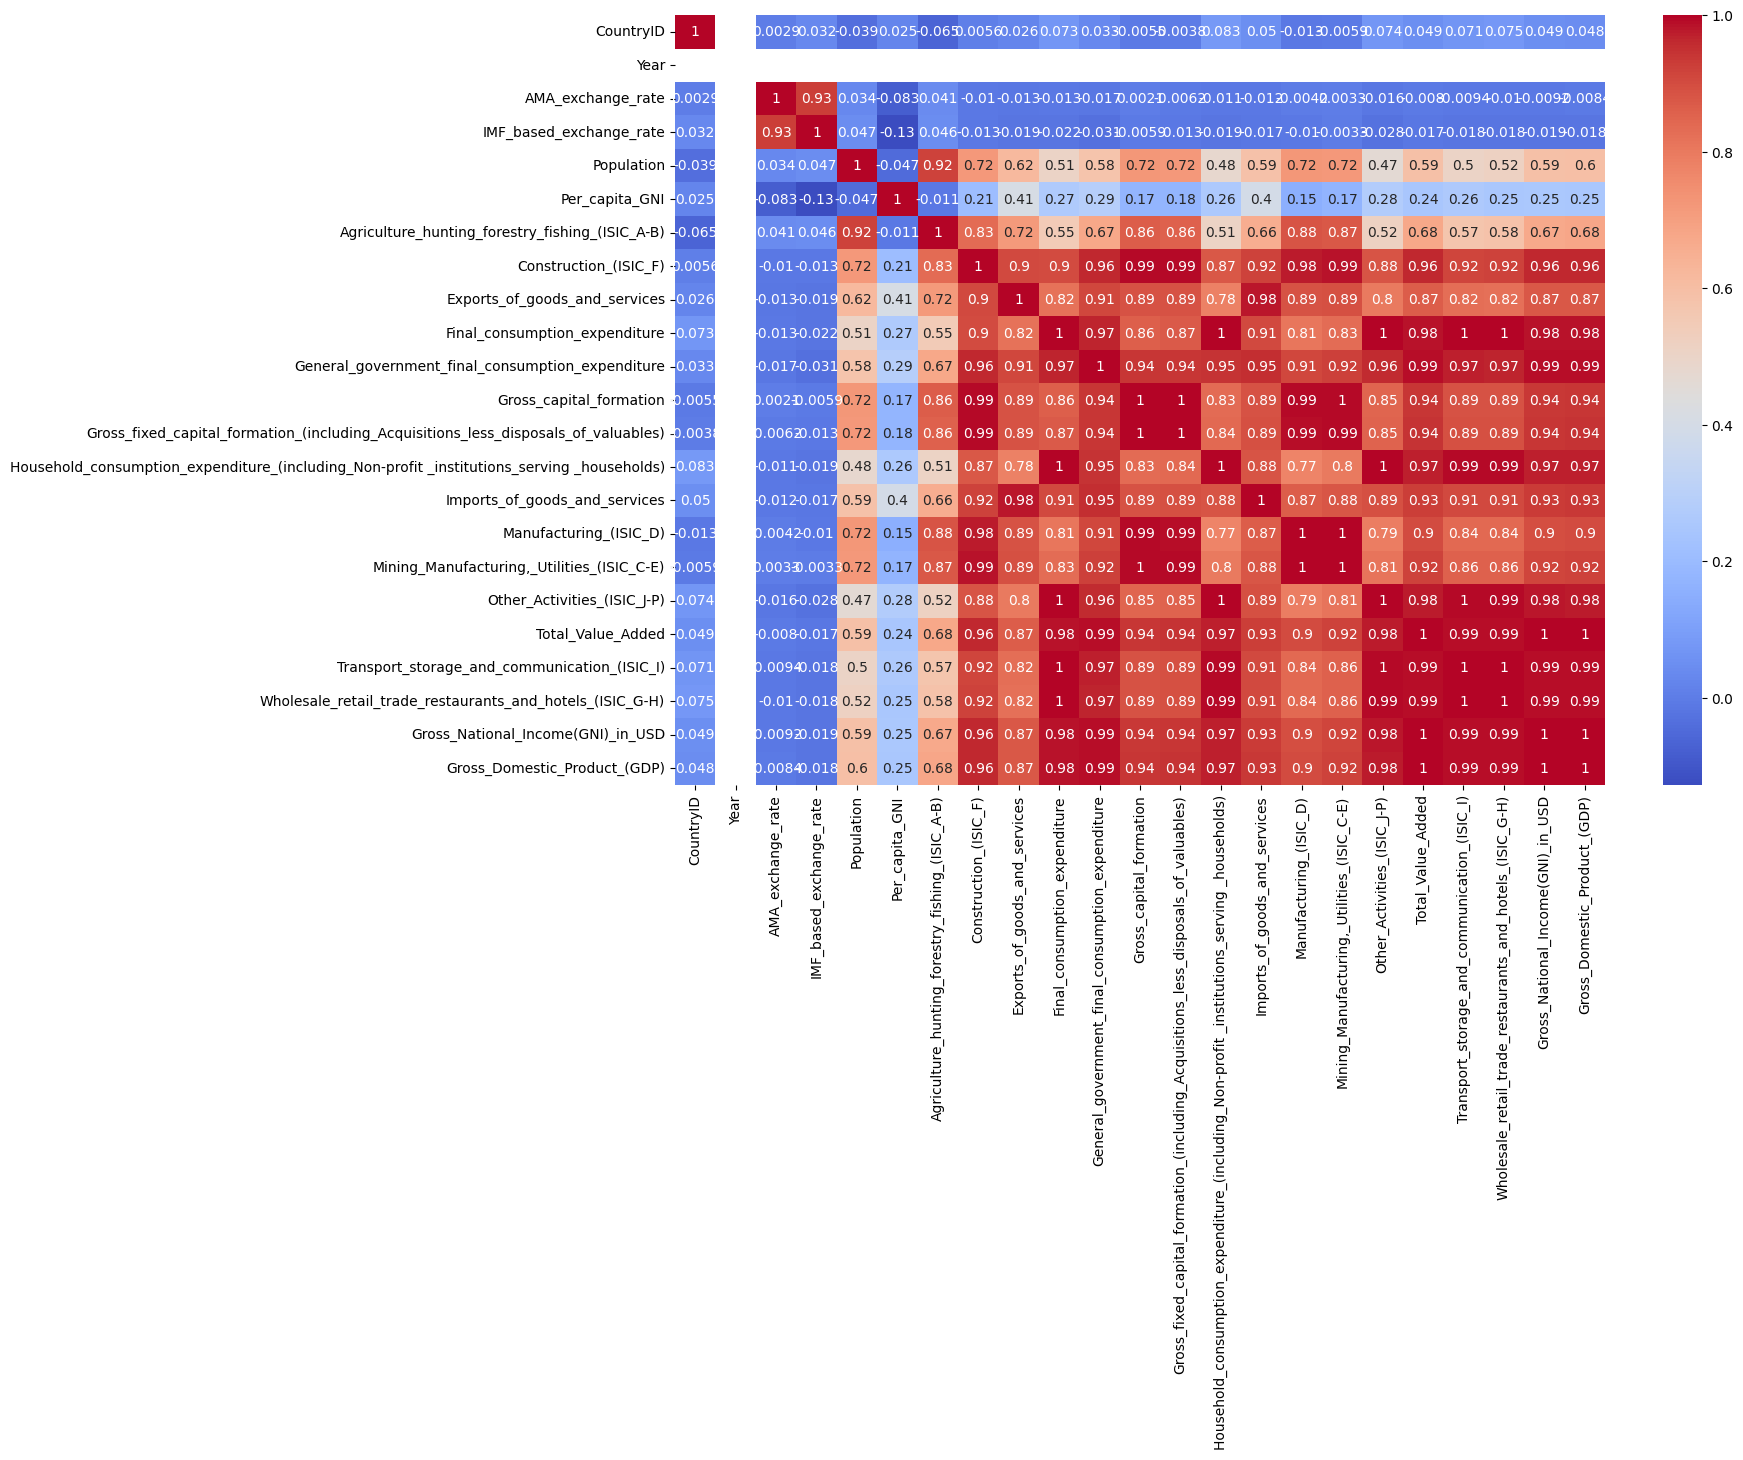

In [37]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(variables_filtradas.corr(), annot=True, cmap='coolwarm')
plt.show()

Se observa que la gran mayoria de las variables estan altamente correlacionadas. Es decir, que otra opcion podría haber sido dismunuir la cantidad de variables.

####Normalizando los datos

En este caso se ha optado por hacer las variables per capita, como en el método Jerárquico. El filtro solo está tomando las variables por pais y año, es decir que el per cápita tendrá mayor sentido que la normalización

In [38]:
print(variables_filtradas.columns)


Index(['CountryID', 'Country', 'Year', 'AMA_exchange_rate',
       'IMF_based_exchange_rate', 'Population', 'Currency', 'Per_capita_GNI',
       'Agriculture_hunting_forestry_fishing_(ISIC_A-B)',
       'Construction_(ISIC_F)', 'Exports_of_goods_and_services',
       'Final_consumption_expenditure',
       'General_government_final_consumption_expenditure',
       'Gross_capital_formation',
       'Gross_fixed_capital_formation_(including_Acquisitions_less_disposals_of_valuables)',
       'Household_consumption_expenditure_(including_Non-profit _institutions_serving _households)',
       'Imports_of_goods_and_services', 'Manufacturing_(ISIC_D)',
       'Mining_Manufacturing,_Utilities_(ISIC_C-E)',
       'Other_Activities_(ISIC_J-P)', 'Total_Value_Added',
       'Transport_storage_and_communication_(ISIC_I)',
       'Wholesale_retail_trade_restaurants_and_hotels_(ISIC_G-H)',
       'Gross_National_Income(GNI)_in_USD', 'Gross_Domestic_Product_(GDP)'],
      dtype='object')


In [39]:
# # Lista de columnas a eliminar

# columns_to_keep = ['Per_capita_GNI',
#                    'Exports_of_goods_and_services',
#                    'Imports_of_goods_and_services',
#                    'Gross_capital_formation',
#                    'Total_Value_Added']
#                    #'Final_consumption_expenditure',
#                    #'General_government_final_consumption_expenditure',

#                    #'Gross_Domestic_Product_(GDP)']

# # Crear una nueva variable que contenga solo las columnas que deseas mantener
# variables_filtradas = variables_filtradas[columns_to_keep]


In [40]:
# Lista de columnas a eliminar
columns_to_drop = ['Year', 'CountryID', 'Currency', 'AMA_exchange_rate', 'IMF_based_exchange_rate']

# Eliminar las columnas del DataFrame
variables_filtradas = variables_filtradas.drop(columns=columns_to_drop, axis=1)

In [41]:
# Crear una copia de variables_filtradas para evitar modificar el original
variables_filtradas_percapita = variables_filtradas.copy()

# Lista de columnas a convertir a per cápita
columns_to_convert = [
    'Agriculture_hunting_forestry_fishing_(ISIC_A-B)',
    'Construction_(ISIC_F)',
    'Exports_of_goods_and_services',
    'Final_consumption_expenditure',
    'General_government_final_consumption_expenditure',
    'Gross_capital_formation',
    'Gross_fixed_capital_formation_(including_Acquisitions_less_disposals_of_valuables)',
    'Household_consumption_expenditure_(including_Non-profit _institutions_serving _households)',
    'Imports_of_goods_and_services',
    'Manufacturing_(ISIC_D)',
    'Mining_Manufacturing,_Utilities_(ISIC_C-E)',
    'Other_Activities_(ISIC_J-P)',
    'Total_Value_Added',
    'Transport_storage_and_communication_(ISIC_I)',
    'Wholesale_retail_trade_restaurants_and_hotels_(ISIC_G-H)',
    'Gross_National_Income(GNI)_in_USD',
    'Gross_Domestic_Product_(GDP)'
]

# Convertir las columnas a per cápita
for column in columns_to_convert:
    variables_filtradas_percapita[column] = variables_filtradas_percapita[column] / variables_filtradas_percapita['Population']



In [42]:
# from sklearn.preprocessing import StandardScaler

# scaaler = StandardScaler()
# variables_filtradas_scaled = scaaler.fit_transform(variables_filtradas.drop('Country',axis=1))

In [43]:
variables_filtradas_percapita = pd.DataFrame(variables_filtradas_percapita, columns = variables_filtradas.drop('Country',axis=1).columns )

In [44]:
variables_filtradas_percapita

Population  Per_capita_GNI  \
103       2854710            6290   
155      44177969            3618   
259      34503774            2070   
343      10312992            5263   
395      45276780           10590   
...           ...             ...   
10248     3426260           16498   
10280    34081449            2023   
10332    28199867            3528   
10384      218764            3825   
10511    19473125            1062   

       Agriculture_hunting_forestry_fishing_(ISIC_A-B)  Construction_(ISIC_F)  \
103                                        1131.102333             609.928405   
155                                         450.538793             411.506510   
259                                         234.796959             127.729716   
343                                         311.246470             312.050710   
395                                         648.287052             394.580173   
...                                                ...                    ...   
10248                                      1141.144636             792.265712   
10280                                       507.537721             126.669960   
10332                                       202.217892              89.253389   
10384                                       363.955989             169.394160   
10511                                        32.276724             167.005379   

       Exports_of_goods_and_services  Final_consumption_expenditure  \
103                      1958.352415                    5557.035896   
155                       989.264734                    2286.207408   
259                       901.217369                    1046.419833   
343                      2471.411503                    3492.139989   
395                      1940.678102                    8260.304730   
...                              ...                            ...   
10248                    5450.383294                   13064.141796   
10280                     482.277926                    1540.398642   
10332                    1048.026134                    3829.805297   
10384                     447.090847                    4005.831421   
10511                     590.626540                     587.714739   

       General_government_final_consumption_expenditure  \
103                                          751.929827   
155                                          644.644372   
259                                          162.655806   
343                                          711.546801   
395                                         1704.919813   
...                                                 ...   
10248                                       2891.550420   
10280                                        339.240752   
10332                                        334.220215   
10384                                        735.182749   
10511                                        155.152455   

       Gross_capital_formation  \
103                1542.550243   
155                1403.452724   
259                 428.938560   
343                 917.004379   
395                1880.415886   
...                        ...   
10248              3182.339602   
10280               824.436529   
10332               436.200252   
10384              1302.864448   
10511               313.386497   

       Gross_fixed_capital_formation_(including_Acquisitions_less_disposals_of_valuables)  \
103                                          1542.550243                                    
155                                          1289.875318                                    
259                                           393.225694                                    
343                                           878.463615                                    
395                                          1843.509130                                    
...                                                  ...    

Selelccionamos variables que, por conocimiento del tema, son las más relevantes para describir los índices macroeconómicos de los países

In [45]:
# Lista de columnas a eliminar
columns_to_drop = ['Population',
    'Agriculture_hunting_forestry_fishing_(ISIC_A-B)',
    'Construction_(ISIC_F)',
    #'Exports_of_goods_and_services',
    #'Final_consumption_expenditure',
    'General_government_final_consumption_expenditure',
    'Gross_capital_formation',
    'Gross_fixed_capital_formation_(including_Acquisitions_less_disposals_of_valuables)',
    'Household_consumption_expenditure_(including_Non-profit _institutions_serving _households)',
    #'Imports_of_goods_and_services',
    'Manufacturing_(ISIC_D)',
    'Mining_Manufacturing,_Utilities_(ISIC_C-E)',
    'Other_Activities_(ISIC_J-P)',
    #'Total_Value_Added',
    'Transport_storage_and_communication_(ISIC_I)',
    'Wholesale_retail_trade_restaurants_and_hotels_(ISIC_G-H)',
    'Gross_National_Income(GNI)_in_USD',
    'Gross_Domestic_Product_(GDP)']

# Eliminar las columnas del DataFrame
variables_filtradas_percapita = variables_filtradas_percapita.drop(columns=columns_to_drop, axis=1)

In [46]:
variables_filtradas_percapita

Per_capita_GNI  Exports_of_goods_and_services  \
103              6290                    1958.352415   
155              3618                     989.264734   
259              2070                     901.217369   
343              5263                    2471.411503   
395             10590                    1940.678102   
...               ...                            ...   
10248           16498                    5450.383294   
10280            2023                     482.277926   
10332            3528                    1048.026134   
10384            3825                     447.090847   
10511            1062                     590.626540   

       Final_consumption_expenditure  Imports_of_goods_and_services  \
103                      5557.035896                    2808.181680   
155                      2286.207408                     979.142150   
259                      1046.419833                     332.357550   
343                      3492.139989                    1584.112659   
395                      8260.304730                    1608.270864   
...                              ...                            ...   
10248                   13064.141796                    4384.222914   
10280                    1540.398642                     815.541518   
10332                    3829.805297                    1771.795863   
10384                    4005.831421                    1966.481039   
10511                     587.714739                     397.226163   

       Total_Value_Added  
103          5577.937334  
155          3553.807555  
259          2043.005248  
343          4849.029263  
395          8944.982395  
...                  ...  
10248       15203.996032  
10280        1943.511782  
10332        3758.882976  
10384        3556.258786  
10511        1063.647529  

[165 rows x 5 columns]

In [47]:
# variables_filtradas_scaled = pd.DataFrame(variables_filtradas_scaled, columns=variables_filtradas.columns)


In [48]:
# variables_filtradas_scaled

####Shuffle

In [49]:
# Hacemos un shuffle de los datos para que no se aprenda el orden

variables_filtradas_percapita = variables_filtradas_percapita.sample(frac=1).reset_index(drop=True)

# Recheck
variables_filtradas_percapita[:10]

Per_capita_GNI  Exports_of_goods_and_services  \
0            9956                    4127.693701   
1           18139                   15242.354466   
2            4588                    2881.203721   
3           36453                   16908.387712   
4            2809                     882.359582   
5           11627                    4506.488442   
6            3825                     447.090847   
7           12324                    2475.640773   
8            2144                     854.557817   
9            6446                    1925.918584   

   Final_consumption_expenditure  Imports_of_goods_and_services  \
0                    7742.385317                    4301.325176   
1                   12976.599072                   15242.354466   
2                    3209.519127                    2783.716344   
3                   19835.942825                   12048.904642   
4                    2204.900111                    1494.922617   
5                    9816.082243                    4299.821559   
6                    4005.831421                    1966.481039   
7                    6753.660239                    2146.022880   
8                    1393.353395                    1320.000000   
9                    4953.215691                    1749.337003   

   Total_Value_Added  
0        9470.807727  
1       15860.287755  
2        5136.964542  
3       36469.609992  
4        2927.668138  
5       11458.440026  
6        3556.258786  
7       12413.269599  
8        1989.836832  
9        6050.634737

####Aplicando los K-means

In [50]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters = _, n_init='auto')
    y = km.fit_predict(variables_filtradas_percapita)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(variables_filtradas_percapita,y))

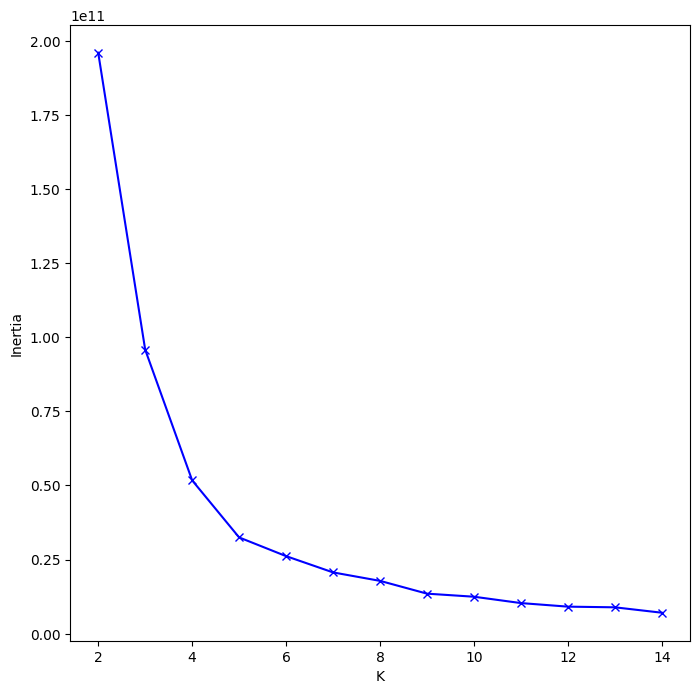

In [51]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

El diagrama de codo da tan claro como en el caso anterior donde teniamos menos variables y menos datos.Pareciera que de 4 a 6 puede ser un buen rango

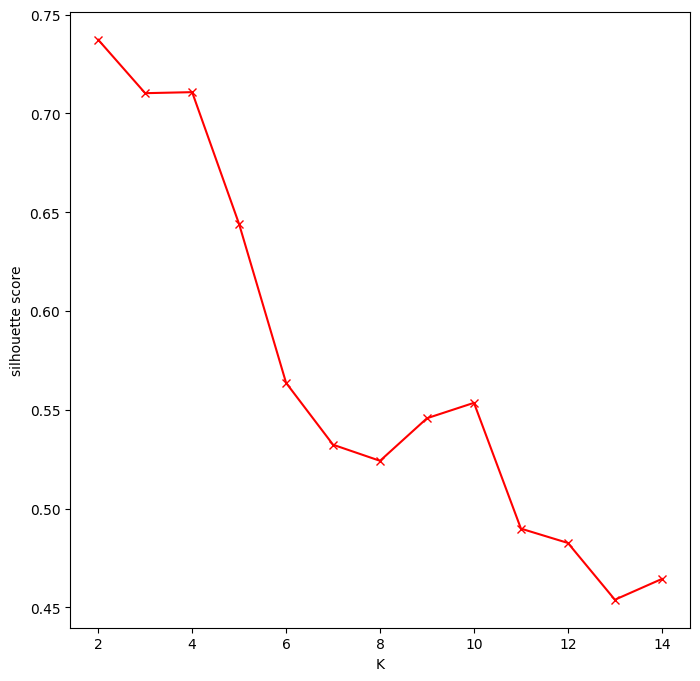

In [52]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

In [53]:
km = KMeans(n_clusters = 4, n_init='auto')
y = km.fit_predict(variables_filtradas_percapita)
print(silhouette_score(variables_filtradas_percapita, y))
variables_filtradas['k_means'] = y

0.709057780689011


El gráfico de silueta nos muestra que despues de 2, 3 o 4 son buenas opciones para el número de clusters ya que tienen los segundos mejores indices de silueta

####Evaluación de resultados

In [54]:
variables_filtradas.columns

Index(['Country', 'Population', 'Per_capita_GNI',
       'Agriculture_hunting_forestry_fishing_(ISIC_A-B)',
       'Construction_(ISIC_F)', 'Exports_of_goods_and_services',
       'Final_consumption_expenditure',
       'General_government_final_consumption_expenditure',
       'Gross_capital_formation',
       'Gross_fixed_capital_formation_(including_Acquisitions_less_disposals_of_valuables)',
       'Household_consumption_expenditure_(including_Non-profit _institutions_serving _households)',
       'Imports_of_goods_and_services', 'Manufacturing_(ISIC_D)',
       'Mining_Manufacturing,_Utilities_(ISIC_C-E)',
       'Other_Activities_(ISIC_J-P)', 'Total_Value_Added',
       'Transport_storage_and_communication_(ISIC_I)',
       'Wholesale_retail_trade_restaurants_and_hotels_(ISIC_G-H)',
       'Gross_National_Income(GNI)_in_USD', 'Gross_Domestic_Product_(GDP)',
       'k_means'],
      dtype='object')

Distribución de kmeans

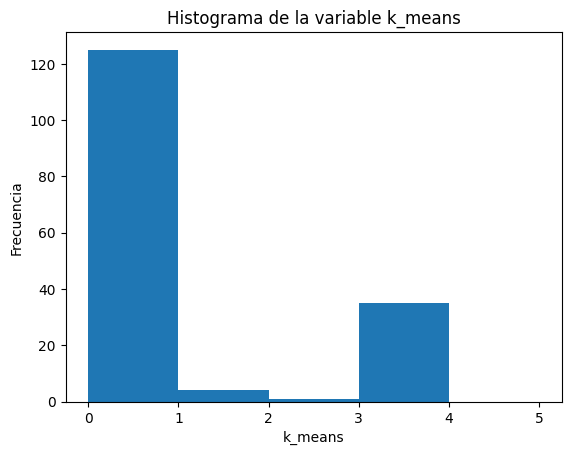

In [55]:
import matplotlib.pyplot as plt

# Histograma de la variable 'k_means'
plt.hist(variables_filtradas['k_means'], bins=range(6))
plt.xlabel('k_means')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable k_means')
plt.show()

####Pair Plot

Al haber tantas variables, utilizamos la tabla de correlaciones para seleccionar una menor cantidad para que el pairplot no demore tanto en su ejecución

In [56]:
# # sns.pairplot(data = variables_filtradas[['AMA_exchange_rate', 'IMF_based_exchange_rate', 'Population',
#        'Per_capita_GNI', 'Agriculture_hunting_forestry_fishing_(ISIC_A-B)',
#        'Construction_(ISIC_F)', 'Exports_of_goods_and_services',
#        'Final_consumption_expenditure',
#        'General_government_final_consumption_expenditure',
#        'Gross_capital_formation',
#        'Gross_fixed_capital_formation_(including_Acquisitions_less_disposals_of_valuables)',
#        'Household_consumption_expenditure_(including_Non-profit _institutions_serving _households)',
#        'Imports_of_goods_and_services', 'Manufacturing_(ISIC_D)',
#        'Mining_Manufacturing,_Utilities_(ISIC_C-E)',
#        'Other_Activities_(ISIC_J-P)', 'Total_Value_Added',
#        'Transport_storage_and_communication_(ISIC_I)',
#        'Wholesale_retail_trade_restaurants_and_hotels_(ISIC_G-H)',
#        'Gross_National_Income(GNI)_in_USD', 'Gross_Domestic_Product_(GDP)',
#        'k_means']], hue='k_means', palette='coolwarm')

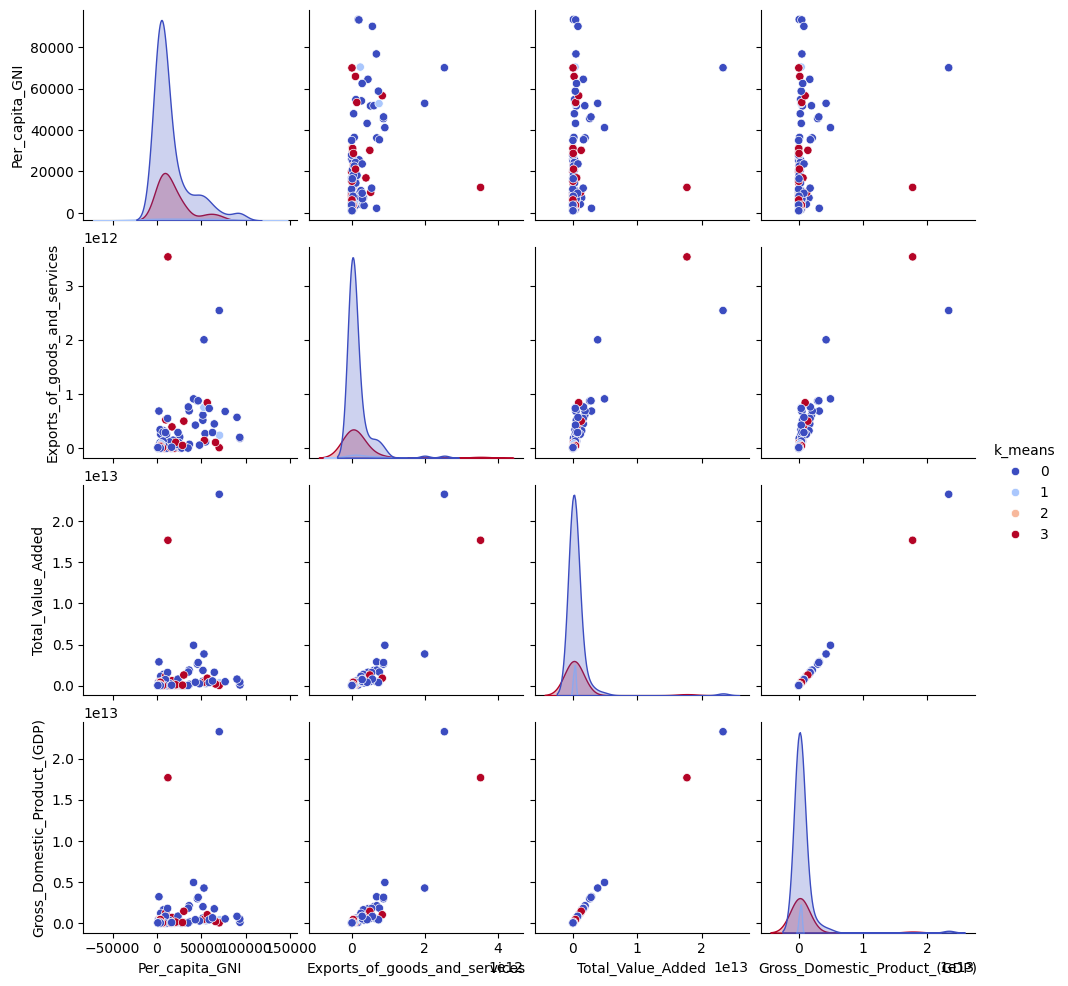

In [57]:
sns.pairplot(data = variables_filtradas[['Per_capita_GNI', 'Exports_of_goods_and_services',
                                        #  'Imports_of_goods_and_services',
        # 'Final_consumption_expenditure',
      #  'General_government_final_consumption_expenditure',
      #  'Gross_capital_formation',
       'Total_Value_Added',
       'Gross_Domestic_Product_(GDP)',
       'k_means']], hue='k_means', palette='coolwarm')

Visualizando a que kmean pertenece cada país

In [58]:
variables_filtradas[variables_filtradas['k_means']==0]

Country  Population  Per_capita_GNI  \
103           Albania      2854710            6290   
155           Algeria     44177969            3618   
259            Angola     34503774            2070   
395         Argentina     45276780           10590   
447         Australia     25921089           64490   
...                ...         ...             ...   
10144   United States    336997624           70081   
10248         Uruguay      3426260           16498   
10280      Uzbekistan     34081449            2023   
10384           Samoa       218764            3825   
10511          Zambia     19473125            1062   

       Agriculture_hunting_forestry_fishing_(ISIC_A-B)  Construction_(ISIC_F)  \
103                                       3.228969e+09           1.741169e+09   
155                                       1.990389e+10           1.817952e+10   
259                                       8.101381e+09           4.407157e+09   
395                                       2.935235e+10           1.786532e+10   
447                                       5.503130e+10           1.190000e+11   
...                                                ...                    ...   
10144                                     2.070000e+11           9.450000e+11   
10248                                     3.909858e+09           2.714508e+09   
10280                                     1.729762e+10           4.317096e+09   
10384                                     7.962047e+07           3.705734e+07   
10511                                     6.285287e+08           3.252117e+09   

       Exports_of_goods_and_services  Final_consumption_expenditure  \
103                     5.590528e+09                   1.586373e+10   
155                     4.370371e+10                   1.010000e+11   
259                     3.109540e+10                   3.610543e+10   
395                     8.786766e+10                   3.740000e+11   
447                     4.480000e+11                   1.230000e+12   
...                              ...                            ...   
10144                   2.540000e+12                   1.930000e+13   
10248                   1.867443e+10                   4.476115e+10   
10280                   1.643673e+10                   5.249902e+10   
10384                   9.780738e+07                   8.763317e+08   
10511                   1.150134e+10                   1.144464e+10   

       General_government_final_consumption_expenditure  \
103                                        2.146542e+09   
155                                        2.847908e+10   
259                                        5.612239e+09   
395                                        7.719328e+10   
447                                        3.820000e+11   
...                                                 ...   
10144                                      3.350000e+12   
10248                                      9.907204e+09   
10280                                      1.156182e+10   
10384                                      1.608315e+08   
10511                                      3.021303e+09   

       Gross_capital_formation  \
103               4.403534e+09   
155               6.200169e+10   
259               1.480000e+10   
395               8.513918e+10   
447               4.030000e+11   
...                        ...   
10144             4.920000e+12   
10248             1.090352e+10   
10280             2.809799e+10   
10384             2.850198e+08   
10511             6.102614e+09   

       Gross_fixed_capital_formation_(including_Acquisitions_less_disposals_of_valuables)  \
103                                         4.403534e+09                                    
155                                         5.698407e+10                                    
259                                         1.356777e+10                                    
395                                         8.3468

Visualización en Mapamundi

<ipython-input-59-e363d0c0ce5c>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


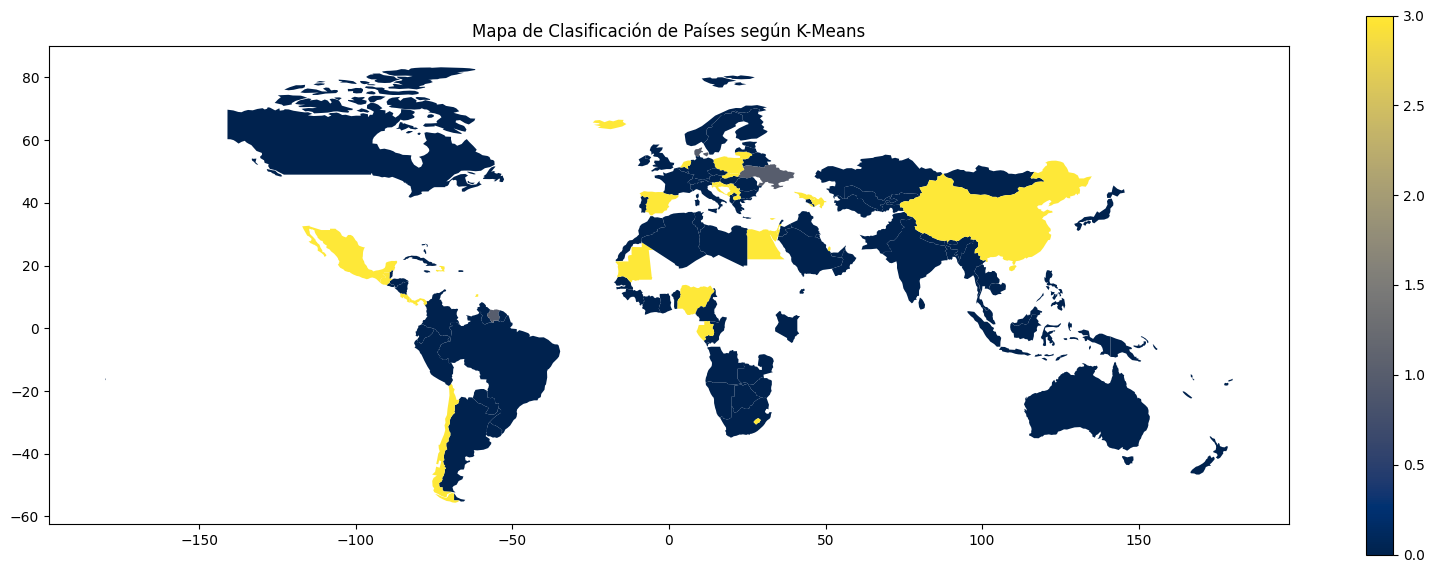

In [59]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar datos geoespaciales del mundo y fusionarlos con el df
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Remove leading and trailing whitespaces in country names
world['name'] = world['name'].str.strip()
variables_filtradas['Country'] = variables_filtradas['Country'].str.strip()

Clasificacion = pd.DataFrame({
    'Country': variables_filtradas.Country,
    'k_means': variables_filtradas.k_means
})

world = world.merge(Clasificacion, how='left', left_on='name', right_on='Country')

# Crear el gráfico
fig, ax = plt.subplots(1, 1, figsize=(20, 7))

world.plot(ax=ax, column='k_means', legend=True, cmap='cividis')

plt.title('Mapa de Clasificación de Países según K-Means')
plt.show()


#### k Means Conclusiones

El método de k means es una herramienta poderosa para identificar clusters. Es importante tener en cuenta la escala de los datos y las unidades, ya que, al utilizar distancias para determinar centroides, es necesario que o los datos estén normalizados (adimensionales) o tengan las mismas unidades.

Cuando se utilizan bastantes variables, se hace cada vez más difícil encontrar clusters. Es importante conocer los datasets y acotar las variables y los datos que se tienen.

En el caso de mejora propuesto, teniendo una representación gráfica del fenómeno en el mapamundi, es importante utilizar un solo dato por país, o agrupar datos por país para poder representarlo.

Para obtener mejores resultados, es necesario acotar aún más las variables que intervienen.

En cuanto a los costos computacionales, el método de k-means tiene costos asociados que dependen principalmente del número datos (n) y el número de clusters (k). Por esta razón es importante identificar variables correlacionadas, o hacer PCA para reducir el número de variables sin tener perdida de información


###3. Clustering - **DBSCAN**

####Filtrando los datos

In [60]:
#Nuevo filtro para analizar los datos macroeconomicos del 2010 al 2019 con etiqueta
indices_dbscan = global_indicators[(global_indicators['Year'] >= 2010) & (global_indicators['Year'] <= 2019) &
(global_indicators['Population'] > 1000000) & (global_indicators['Per_capita_GNI'] > 10000)]



In [61]:
# Lista de columnas a eliminar
columns_to_drop = ['Year', 'CountryID', 'Currency', 'AMA_exchange_rate', 'IMF_based_exchange_rate', 'Changes_in_inventories']
# Eliminar las columnas del DataFrame
indices_dbscan = indices_dbscan.drop(columns=columns_to_drop, axis=1)

In [62]:
indices_dbscan

Country  Population  Per_capita_GNI  \
384                              Argentina     41100123           10023   
385                              Argentina     41520740           12404   
386                              Argentina     41952365           13532   
387                              Argentina     42388269           14159   
388                              Argentina     42824054           12970   
...                                     ...         ...             ...   
10322   Venezuela (Bolivarian Republic of)     29096159           10416   
10323   Venezuela (Bolivarian Republic of)     29470426           12657   
10324   Venezuela (Bolivarian Republic of)     29838021           12191   
10325   Venezuela (Bolivarian Republic of)     30193258           11917   
10326   Venezuela (Bolivarian Republic of)     30529716           10946   

       Agriculture_hunting_forestry_fishing_(ISIC_A-B)  Construction_(ISIC_F)  \
384                                       3.041780e+10           1.859999e+10   
385                                       3.710436e+10           2.571446e+10   
386                                       3.361685e+10           2.822699e+10   
387                                       3.712352e+10           2.992466e+10   
388                                       3.806440e+10           2.628860e+10   
...                                                ...                    ...   
10322                                     1.586506e+10           2.343576e+10   
10323                                     1.912666e+10           3.178957e+10   
10324                                     1.820514e+10           3.062404e+10   
10325                                     1.827467e+10           3.092564e+10   
10326                                     1.477735e+10           1.844695e+10   

       Exports_of_goods_and_services  Final_consumption_expenditure  \
384                     8.075038e+10                   3.390000e+11   
385                     9.780999e+10                   4.240000e+11   
386                     9.441193e+10                   4.740000e+11   
387                     8.964947e+10                   5.080000e+11   
388                     8.168629e+10                   4.670000e+11   
...                              ...                            ...   
10322                   9.476441e+10                   2.110000e+11   
10323                   9.978645e+10                   2.720000e+11   
10324                   9.196206e+10                   2.880000e+11   
10325                   6.069008e+10                   3.270000e+11   
10326                   1.270000e+11                   3.280000e+11   

       General_government_final_consumption_expenditure  \
384                                        6.467135e+10   
385                                        8.317629e+10   
386                                        9.678172e+10   
387                                        1.030000e+11   
388                                        9.611430e+10   
...                                                 ...   
10322                                      3.645187e+10   
10323                                      4.648637e+10   
10324                                      4.600459e+10   
10325                                      5.309024e+10   
10326                                      3.337755e+10   

       Gross_capital_formation  \
384               7.551188e+10   
385               9.754093e+10   
386               9.594765e+10   
387               1.060000e+11   
388               9.788919e+10   
...                        ...   
10322             7.302007e+10   
10323             1.010000e+11   
10324             1.010000e+11   
10325             9.019702e+10   
10326             1.060000e+11   

       Gross_fixed_capital_formation_(including_Acquisitions_less_disposals_of_valuables)  \
384                                         7.097376e+10                                    
385  

####Normalizando Datos

In [63]:
from sklearn.preprocessing import StandardScaler

scaaler = StandardScaler()
indices_dbscan_scaled = scaaler.fit_transform(indices_dbscan.drop('Country',axis=1))

In [64]:
indices_dbscan_scaled = pd.DataFrame(indices_dbscan_scaled, columns = indices_dbscan.drop('Country',axis=1).columns )

In [65]:
indices_dbscan_scaled

Population  Per_capita_GNI  \
0      0.098742       -1.128443   
1      0.103900       -1.010580   
2      0.109193       -0.954742   
3      0.114539       -0.923705   
4      0.119883       -0.982562   
..          ...             ...   
515   -0.048469       -1.108989   
516   -0.043879       -0.998056   
517   -0.039371       -1.021124   
518   -0.035014       -1.034687   
519   -0.030888       -1.082753   

     Agriculture_hunting_forestry_fishing_(ISIC_A-B)  Construction_(ISIC_F)  \
0                                           0.211330              -0.303097   
1                                           0.333813              -0.240242   
2                                           0.269930              -0.218045   
3                                           0.334164              -0.203047   
4                                           0.351399              -0.235170   
..                                               ...                    ...   
515                                        -0.055244              -0.260374   
516                                         0.004501              -0.186571   
517                                        -0.012379              -0.196868   
518                                        -0.011106              -0.194203   
519                                        -0.075169              -0.304449   

     Exports_of_goods_and_services  Final_consumption_expenditure  \
0                        -0.560176                      -0.225061   
1                        -0.520398                      -0.185571   
2                        -0.528321                      -0.162341   
3                        -0.539426                      -0.146545   
4                        -0.557994                      -0.165593   
..                             ...                            ...   
515                      -0.527499                      -0.284528   
516                      -0.515789                      -0.256188   
517                      -0.534033                      -0.248755   
518                      -0.606951                      -0.230636   
519                      -0.452334                      -0.230171   

     General_government_final_consumption_expenditure  \
0                                           -0.305446   
1                                           -0.260857   
2                                           -0.228074   
3                                           -0.213090   
4                                           -0.229682   
..                                                ...   
515                                         -0.373443   
516                                         -0.349264   
517                                         -0.350425   
518                                         -0.333352   
519                                         -0.380851   

     Gross_capital_formation  \
0                  -0.278602   
1                  -0.241973   
2                  -0.244622   
3                  -0.227908   
4                  -0.241394   
..                       ...   
515                -0.282745   
516                -0.236221   
517                -0.236221   
518                -0.254184   
519                -0.227908   

     Gross_fixed_capital_formation_(including_Acquisitions_less_disposals_of_valuables)  \
0                                            -0.279986                                    
1                                            -0.245416                                    
2                                            -0.244137                                    
3                                            -0.231123                                    
4                                            -0.246816                                    
..                                                 ...                                    
515                                          -0.305077                                    
516     

####Buscando Epsilon y el numero de puntos

In [66]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(indices_dbscan_scaled)
distances, indices = neighbors_fit.kneighbors(indices_dbscan_scaled)

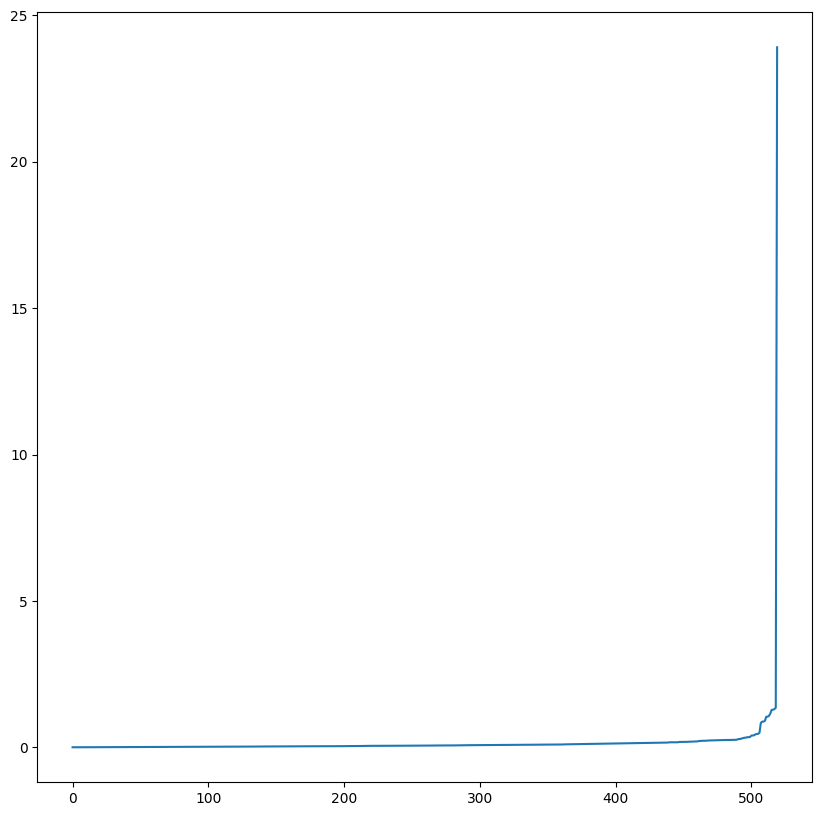

In [67]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

Según la gráfica podemos observar que la "rodilla" se haya entre los valores 0 y 1

####Creando el set de datos

In [68]:
eps_values = np.arange(0.01, 1.0, 0.10)
min_samples = np.arange(3,12)

####Iterando sobre la combinatoria de estos productos

In [69]:
from itertools import product
dbscan_paramns = list(product(eps_values,min_samples))
#Se crean 2 listas para poder iterar sobre ellas
no_of_clusters = []
sil_score = []
#Entrenando a DBSCAN para que tome Epsilon como valor P0 y min samples P1
for p in dbscan_paramns:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(indices_dbscan_scaled)
# LLenando los indices de silueta y el numero de clusters dejando excepción por si hay un fallo
    try:
        sil_score.append(silhouette_score(indices_dbscan_scaled,y_dbscan))
    except:
        sil_score.append(0)
    no_of_clusters.append(len(np.unique(y_dbscan)))

####Haciendo los Pivots para verlo matricialmente

In [70]:
df_param_tunning = pd.DataFrame.from_records(dbscan_paramns, columns=['Eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [71]:
pivot_1 = pd.pivot_table(df_param_tunning, values='sil_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

Graficando para Pivot1 (Silueta)

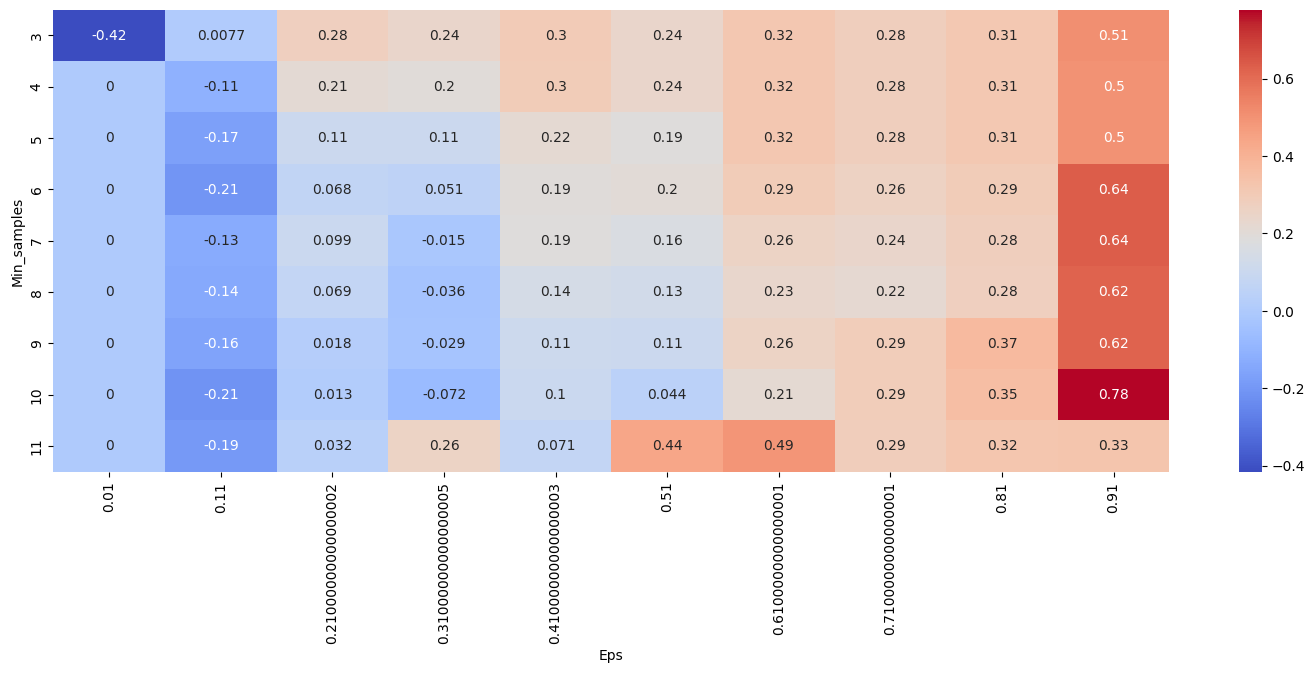

In [72]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

Graficando para Pivot2 (# de Clusters)

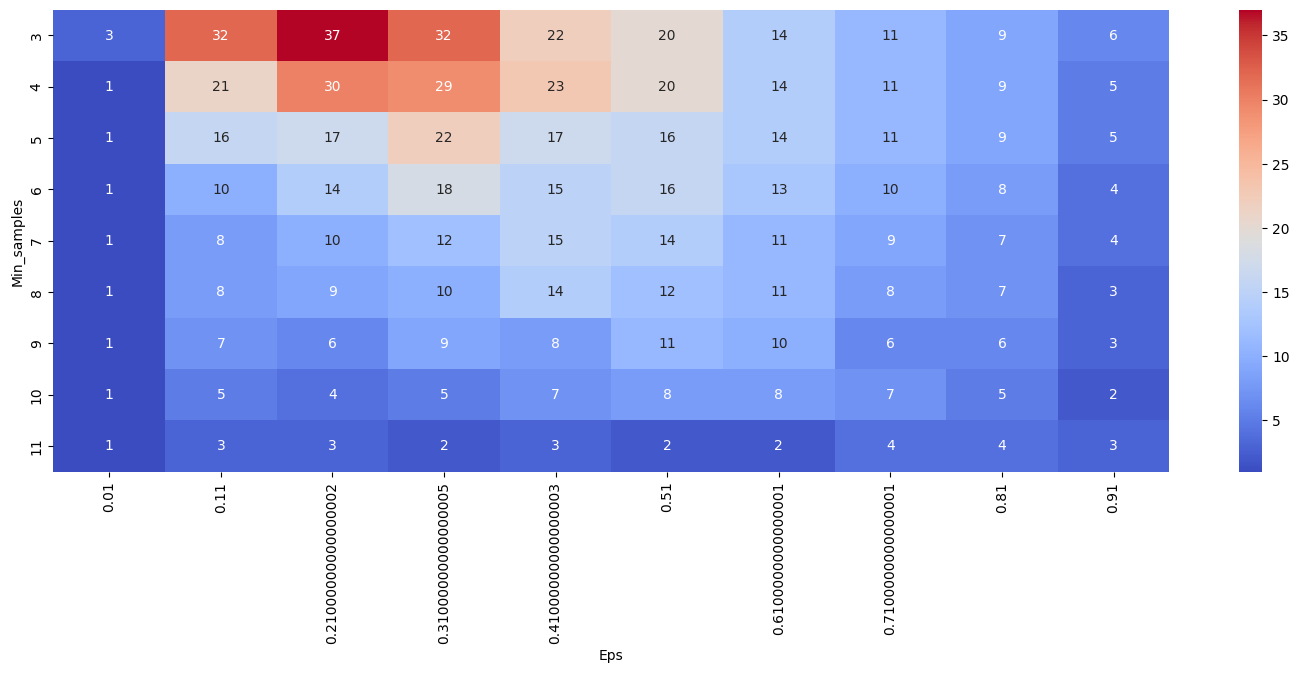

In [73]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

Comparando los dos mapas de calor, se observa que hay un indice de silueta alto en 0.78, pero observando el número de clusters corresponde a solo 2 clusters.
El segundo valor más alto es 0.64 que corresponde a 4 clusters, que puede llegar a ser una mejor opción

Tomamos los valores óptimos de Epsilon de 0.91 y Samples de 7

In [74]:
dbscan_train = DBSCAN(eps=0.91, min_samples=7)
y_dbscan = dbscan_train.fit_predict(indices_dbscan_scaled)
print(silhouette_score(indices_dbscan_scaled,y_dbscan ))
indices_dbscan['dbscan'] = y_dbscan

0.6357845672300073


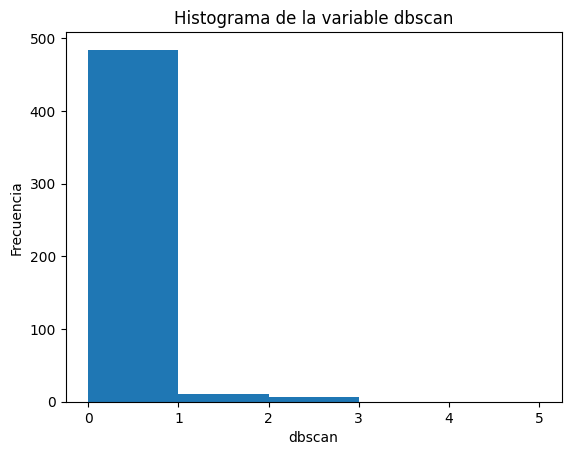

In [75]:
import matplotlib.pyplot as plt

# Histograma de la variable 'dbscan'
plt.hist(indices_dbscan['dbscan'], bins=range(6))
plt.xlabel('dbscan')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable dbscan')
plt.show()

A igual que en los métodos anteriores, vemos que hay una alta frecuencia de datos en un cluster y los restantes tienen una frecuencia mucho menor. Esto hace muy dificil el poder hacer una separación de los datos.

####Visualizando los datos

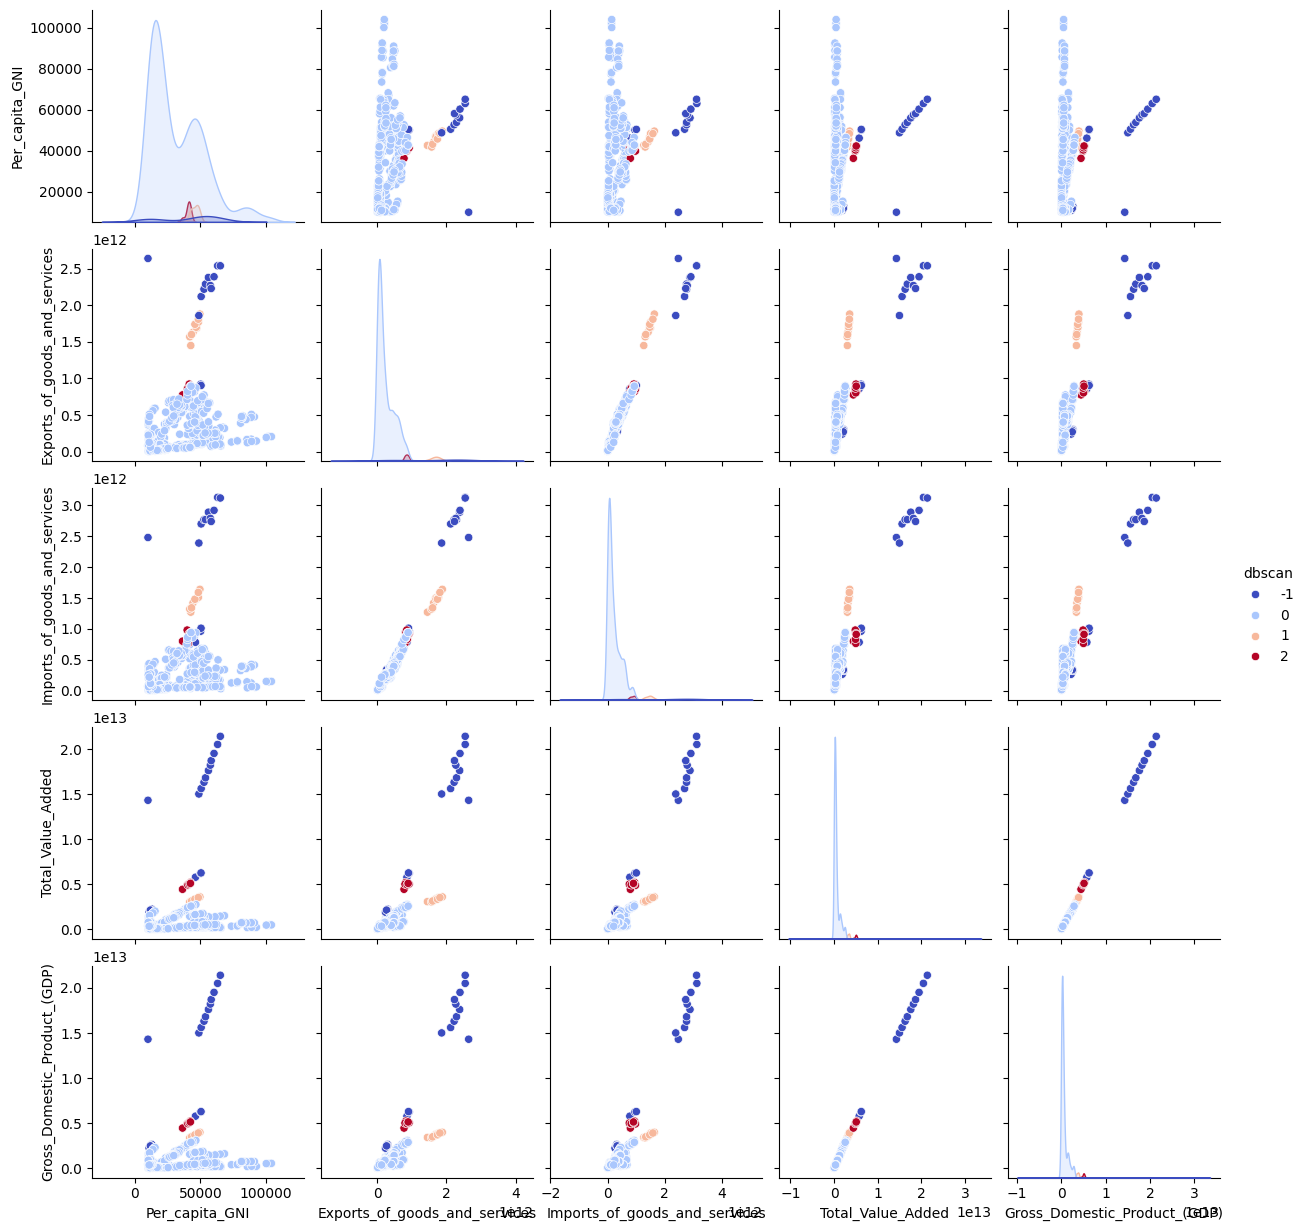

In [76]:
sns.pairplot(data = indices_dbscan[['Per_capita_GNI', 'Exports_of_goods_and_services',
                                          'Imports_of_goods_and_services',
        # 'Final_consumption_expenditure',
      #  'General_government_final_consumption_expenditure',
      #  'Gross_capital_formation',
       'Total_Value_Added',
       'Gross_Domestic_Product_(GDP)',
       'dbscan']], hue='dbscan', palette='coolwarm')

Se observa que en scatterplot de Imports vs Per Capita GNI hay cierta separabilidad de los datos, asi que hacemos zoom en esa combinación de variables

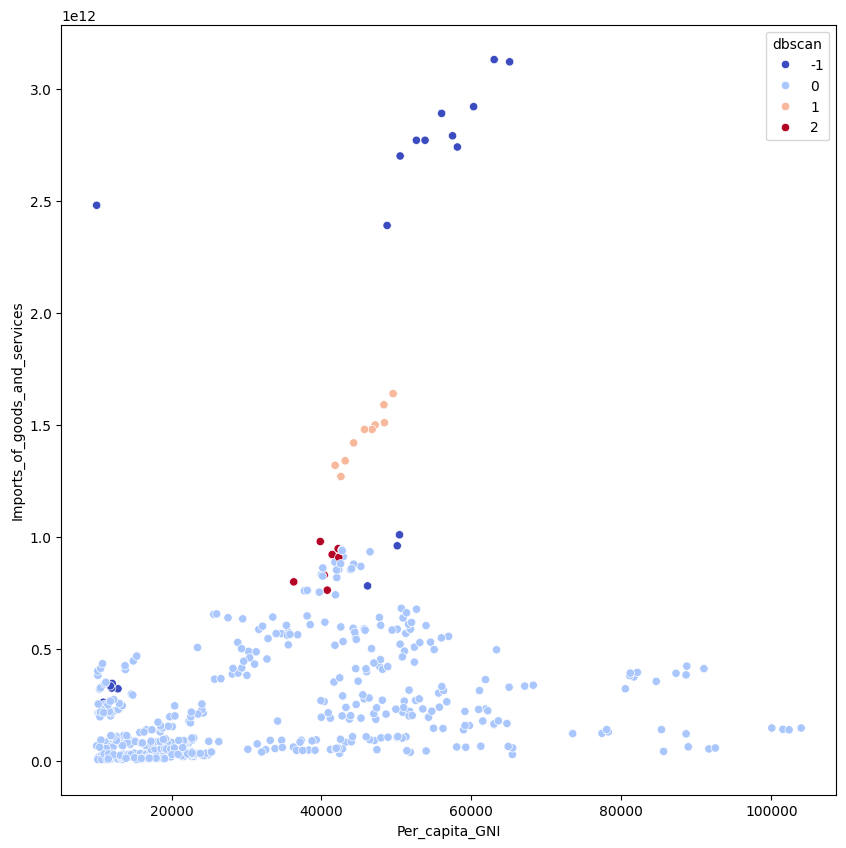

In [77]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=indices_dbscan, x='Per_capita_GNI', y='Imports_of_goods_and_services',hue='dbscan', palette='coolwarm')
plt.show()

In [78]:
indices_dbscan[indices_dbscan['dbscan']==2]

Country  Population  Per_capita_GNI  \
4672   Japan    127678924           42228   
4673   Japan    127476735           39843   
4674   Japan    127250933           36304   
4675   Japan    126993857           40772   
4676   Japan    126662472           40369   
4677   Japan    126255866           41429   
4678   Japan    125791677           42320   

      Agriculture_hunting_forestry_fishing_(ISIC_A-B)  Construction_(ISIC_F)  \
4672                                     5.560083e+10           2.600000e+11   
4673                                     4.880373e+10           2.490000e+11   
4674                                     4.596592e+10           2.300000e+11   
4675                                     5.629044e+10           2.690000e+11   
4676                                     5.564157e+10           2.690000e+11   
4677                                     5.261576e+10           2.700000e+11   
4678                                     5.291916e+10           2.790000e+11   

      Exports_of_goods_and_services  Final_consumption_expenditure  \
4672                   8.230000e+11                   4.070000e+12   
4673                   8.530000e+11                   3.800000e+12   
4674                   7.750000e+11                   3.350000e+12   
4675                   8.030000e+11                   3.720000e+12   
4676                   8.670000e+11                   3.650000e+12   
4677                   9.230000e+11                   3.750000e+12   
4678                   8.940000e+11                   3.820000e+12   

      General_government_final_consumption_expenditure  \
4672                                      1.030000e+12   
4673                                      9.760000e+11   
4674                                      8.720000e+11   
4675                                      9.840000e+11   
4676                                      9.570000e+11   
4677                                      9.860000e+11   
4678                                      1.020000e+12   

      Gross_capital_formation  \
4672             1.270000e+12   
4673             1.230000e+12   
4674             1.120000e+12   
4675             1.240000e+12   
4676             1.240000e+12   
4677             1.290000e+12   
4678             1.320000e+12   

      Gross_fixed_capital_formation_(including_Acquisitions_less_disposals_of_valuables)  \
4672                                       1.280000e+12                                    
4673                                       1.230000e+12                                    
4674                                       1.110000e+12                                    
4675                                       1.240000e+12                                    
4676                                       1.230000e+12                                    
4677                                       1.270000e+12                                    
4678                                       1.310000e+12                                    

      ...  Imports_of_goods_and_services  Manufacturing_(ISIC_D)  \
4672  ...                   9.480000e+11            1.010000e+12   
4673  ...                   9.800000e+11            9.590000e+11   
4674  ...                   8.000000e+11            9.100000e+11   
4675  ...                   7.630000e+11            1.020000e+12   
4676  ...                   8.300000e+11            1.010000e+12   
4677  ...                   9.220000e+11            1.040000e+12   
4678  ...                   9.090000e+11            1.030000e+12   

      Mining_Manufacturing,_Utilities_(ISIC_C-E)  Other_Activities_(ISIC_J-P)  \
4672                                1.130000e+12                 2.350000e+12   
4673                                1.090000e+12                 2.190000e+12   
4674                                1.040000e+12                 1.960000e+12   
4675                                1.160000e+12                 2.210000e+12   
4676                      

Analisando los resultados, se observa que la clusterización hecha por el algoritmo pertenece en su gran mayoria a datos macroeconómicos del país en diferentes años.

Es decir que este método puede ser más útil si se filtran los datos y se hace por años, o aglomerando varios años en 1 solo dato (utilizando la media por ejemplo)

En cuanto a los costos computacionales, al basarse en la densidad es más robusto para conjuntos de datos con estructuras complejas y densidades variables. Su desempeño puede verse afectado por la elección de parámetros iniciales, como la distancia y el número mínimo de puntos vecinos.

In [79]:
# Obtener los nombres de las columnas
nombres_columnas = X = indices_dbscan_scaled.columns

# Imprimir los nombres de las columnas
print(nombres_columnas)

Index(['Population', 'Per_capita_GNI',
       'Agriculture_hunting_forestry_fishing_(ISIC_A-B)',
       'Construction_(ISIC_F)', 'Exports_of_goods_and_services',
       'Final_consumption_expenditure',
       'General_government_final_consumption_expenditure',
       'Gross_capital_formation',
       'Gross_fixed_capital_formation_(including_Acquisitions_less_disposals_of_valuables)',
       'Household_consumption_expenditure_(including_Non-profit _institutions_serving _households)',
       'Imports_of_goods_and_services', 'Manufacturing_(ISIC_D)',
       'Mining_Manufacturing,_Utilities_(ISIC_C-E)',
       'Other_Activities_(ISIC_J-P)', 'Total_Value_Added',
       'Transport_storage_and_communication_(ISIC_I)',
       'Wholesale_retail_trade_restaurants_and_hotels_(ISIC_G-H)',
       'Gross_National_Income(GNI)_in_USD', 'Gross_Domestic_Product_(GDP)'],
      dtype='object')


###3. Clustering - **OPTICS**

In [80]:
from sklearn.cluster import OPTICS
import pandas as pd


# Seleccionar las características relevantes para el clustering
X = indices_dbscan_scaled[['Population', 'Per_capita_GNI',
       'Agriculture_hunting_forestry_fishing_(ISIC_A-B)',
       'Construction_(ISIC_F)', 'Exports_of_goods_and_services',
       'Final_consumption_expenditure',
       'General_government_final_consumption_expenditure',
       'Gross_capital_formation',
       'Gross_fixed_capital_formation_(including_Acquisitions_less_disposals_of_valuables)',
       'Household_consumption_expenditure_(including_Non-profit _institutions_serving _households)',
       'Imports_of_goods_and_services', 'Manufacturing_(ISIC_D)',
       'Mining_Manufacturing,_Utilities_(ISIC_C-E)',
       'Other_Activities_(ISIC_J-P)', 'Total_Value_Added',
       'Transport_storage_and_communication_(ISIC_I)',
       'Wholesale_retail_trade_restaurants_and_hotels_(ISIC_G-H)',
       'Gross_National_Income(GNI)_in_USD', 'Gross_Domestic_Product_(GDP)']]

# Crear una instancia del modelo OPTICS
optics_model = OPTICS()

# Ajustar el modelo a tus datos
optics_model.fit(X)

# Obtener las etiquetas de los clusters
labels = optics_model.labels_

# Añadir las etiquetas al DataFrame original
indices_dbscan_scaled['OPTICS_Cluster'] = labels



####Visualizando los Datos

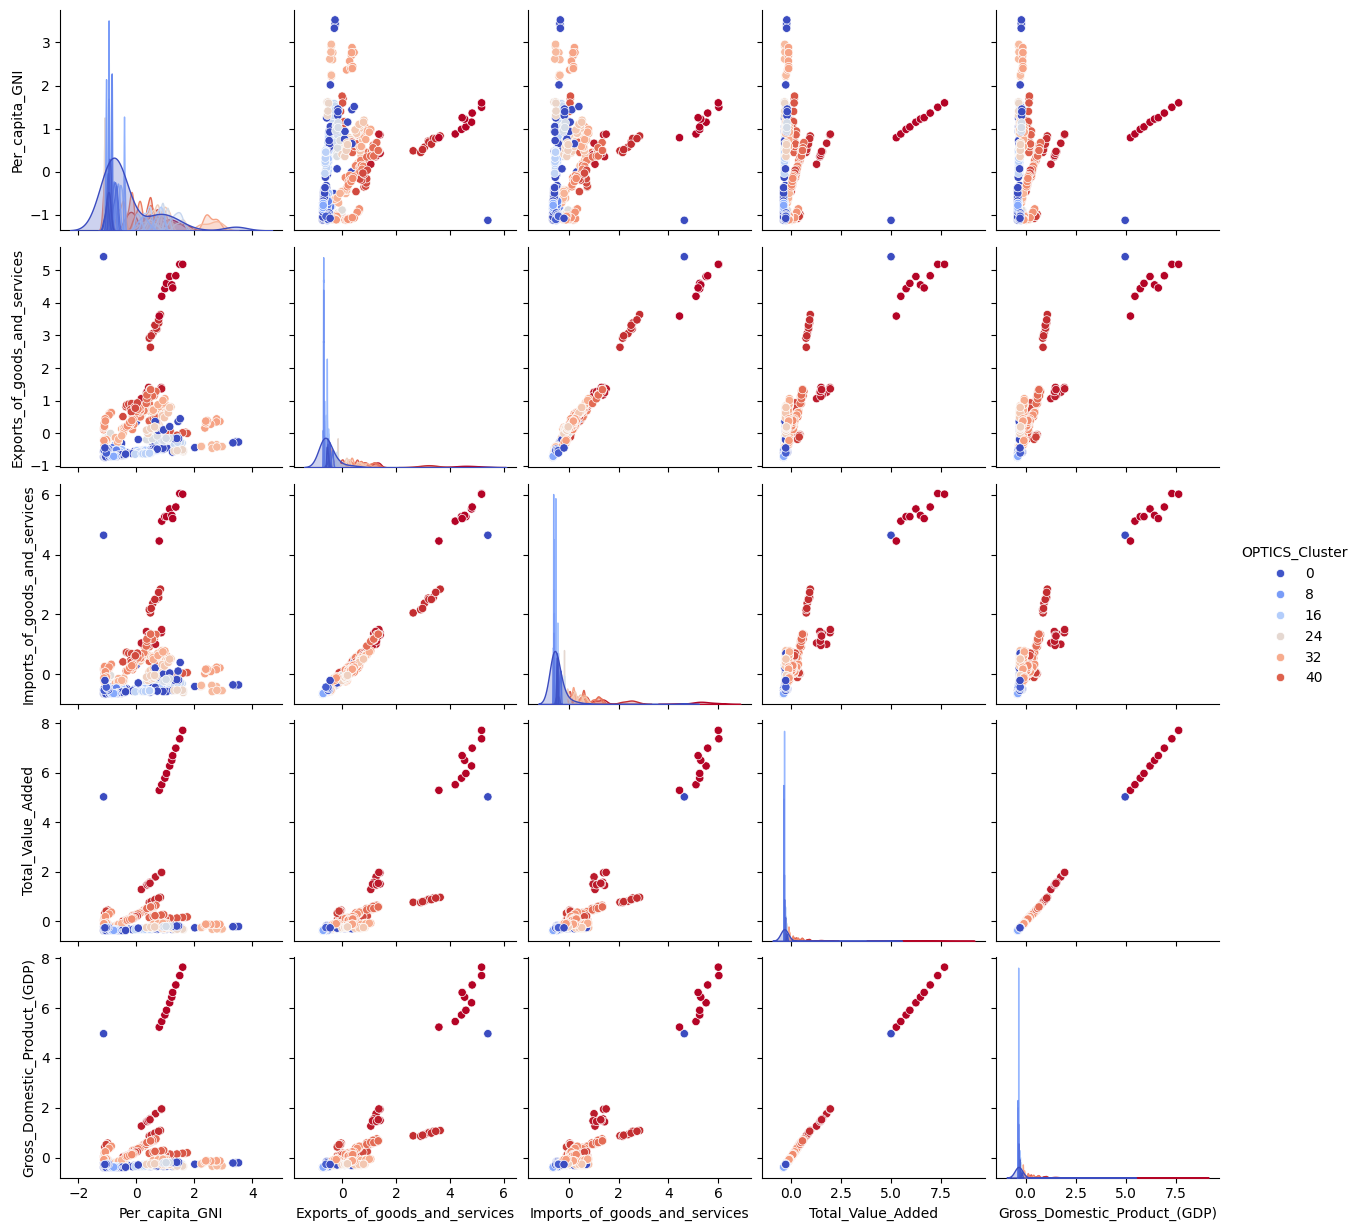

In [81]:
sns.pairplot(data = indices_dbscan_scaled[['Per_capita_GNI', 'Exports_of_goods_and_services',
                                          'Imports_of_goods_and_services',
        # 'Final_consumption_expenditure',
      #  'General_government_final_consumption_expenditure',
      #  'Gross_capital_formation',
       'Total_Value_Added',
       'Gross_Domestic_Product_(GDP)',
       'OPTICS_Cluster']], hue='OPTICS_Cluster', palette='coolwarm')

####Haciendo Zoom

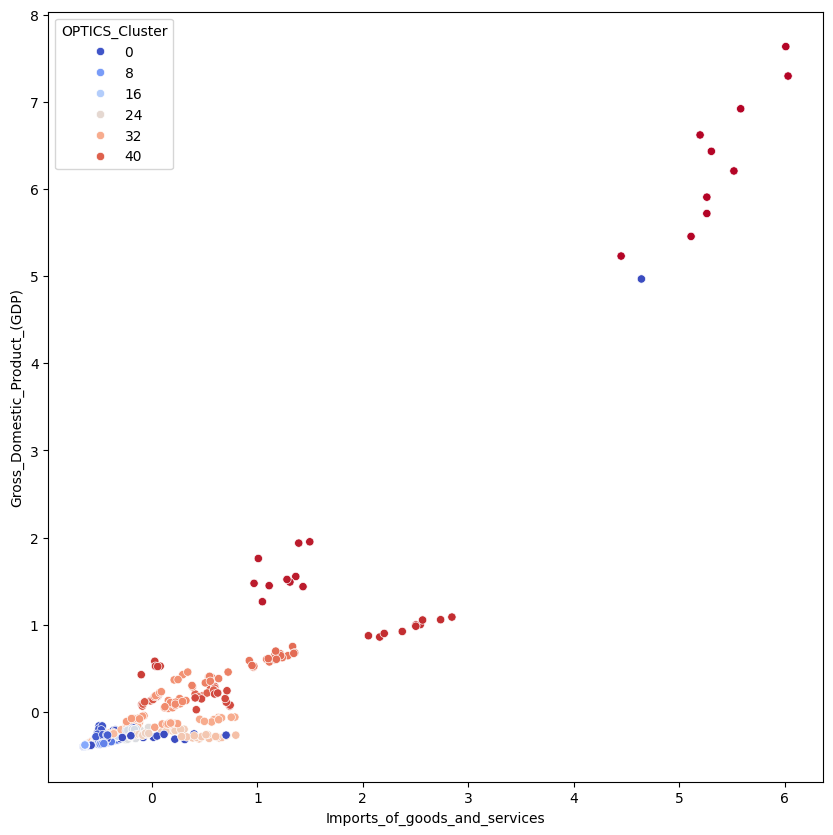

In [82]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=indices_dbscan_scaled, y='Gross_Domestic_Product_(GDP)', x='Imports_of_goods_and_services',hue='OPTICS_Cluster', palette='coolwarm')
plt.show()

####Histogramas de los clusters

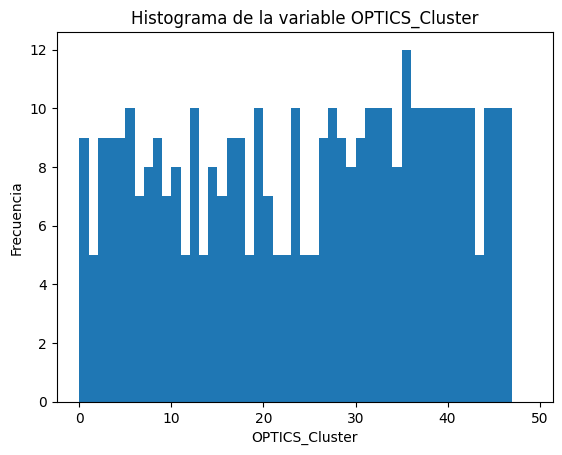

In [83]:
import matplotlib.pyplot as plt

# Histograma de la variable 'OPTICS_Cluster'
plt.hist(indices_dbscan_scaled['OPTICS_Cluster'], bins=range(50))
plt.xlabel('OPTICS_Cluster')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable OPTICS_Cluster')
plt.show()

Ordering Points To Identify the Clustering Structure (OPTICS),también agrupa puntos de datos en función de su cercanía y densidad relativa. Utiliza un enfoque de alcance de vecindad para identificar la estructura de clustering en los datos y no requiere la especificación de un valor de epsilon (ε) como en DBSCAN.

Permite tener una visión general de los datos y alguna idea de clusterización posible. Sin embargo, crea muchos clusters. Habría que acotar el número de variables para ver si se obtienen mejores resultados.

###4. Conclusiones

*   Los modelos de clustering son una herramienta muy poderosa para encontrar similitudes entre el conjunto de datos. Sobre todo si estos datos no están etiquetados, ya que permite hallar relaciones o sinergias que permiten la agrupación o clustering de datos.

*   El método de agrupación Jerárquico se adecua mejor cuando se acotan las variables. Se hace fácil encontrar la altura de corte para determinar el número de clusters. Es un método muy visual que funciona bien cuando se conocen muy bien los datos, se tiene un objetivo o una idea del número de clusters que puede haber.
*   K-Means es un método de agrupación que se basa su funcionamiento en el hallar un centroide a partir de las distancias entre puntos. Por esta razón es importante prestar especial atención a las unidades y ordenes de magnitud en que están los datos. Una buena forma de asegurarse de que los datos son apropiados para el método k Means es normalizar (Estandarizar). Al restar la media y dividir por la desviación estándar queda adimensional y comparable con otras variables continuas. Otra forma de asegurar que las variables tienen órdenes de magnitud más comparables en índices macroeconómicos, es dividir los índices por el tamaño de la población para que queden per cápita.

*   DBSCAN también es un buen método de agrupación que utiliza las densidades de los datos, utilizando parámetros de vecindad y épsilon para determinar los clusters. Pareciera ser más apropiado cuando hay muchas variables en el modelo y las agrupaciones tienen formas irregulares.

*   Por último, OPTICS es un método de agrupación que requiere menos parámetros de entrada para clasificar. Es un buen método para meter muchas variables y entender a priori que sucede con los datos.

*   Costos computacionales.
    * Clasificación jerárquica : Este método de agrupación construye una estructura de árbol (dendograma) para representar las relaciones entre los datos. El costo está asociado al cálculo de distancias entre todos los datos y generar agrupaciones.

    * K-Means: Es de tipo iterativo y se basa en el cálculo de distancias y la actualización de los centroides de los clusters. K-Means puede ser menos costoso (más eficiente) que la clasificación jerárquica, pero puede ser menos eficiente en conjuntos de datos grandes o con muchas dimensiones.

    * DBSCAN: Es más eficiente que la clasificación jerárquica y K-Means en términos de tiempo de ejecución, ya que solo necesita calcular distancias entre puntos cercanos y no requiere un número fijo de iteraciones.


###5. Propuestas para mejora

* Es importante ser organizado en la limpieza de datos. Hubiera leído y entendido bien el proyecto antes de empezar a atacarlo.

De haber hecho esto, habría generado un data set sin variables que no aportan información o tienen poca información. Habría generado un Dataset con variables per cápita y otro con variables normalizadas.

Habría aplicado todos los métodos de clasificación en los dos tipos de dataset (per cápita y normalizado) y observado los resultados.

Luego, hubiera identificado las variables que se correlacionan más para tratar de reducir el número de variables.

Luego habría acotado el problema bien sea agrupando valores para un mismo país en una década o 5 años utilizando la media, por ejemplo. O habría tomado los valores para un año en específico.

Luego generar un dataset con la clasificación de cada uno de los métodos para poder compararlos entre sí.

En general, habría echado un vistazo a los clusters con todas las variables, y luego habría usado cada uno de los métodos de agrupación para ver como potenciarlo, bien sea disminuyendo el número de variables o aglomerando y filtrando datos.
